In [2]:
import healpy as h
%pylab notebook
import sys  ; sys.path.append("../../codes/")
from modules_old import local_eb_kernel as rk
from modules_old import return_rotated_kernel_healpix as rker
import numpy as np
import time

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


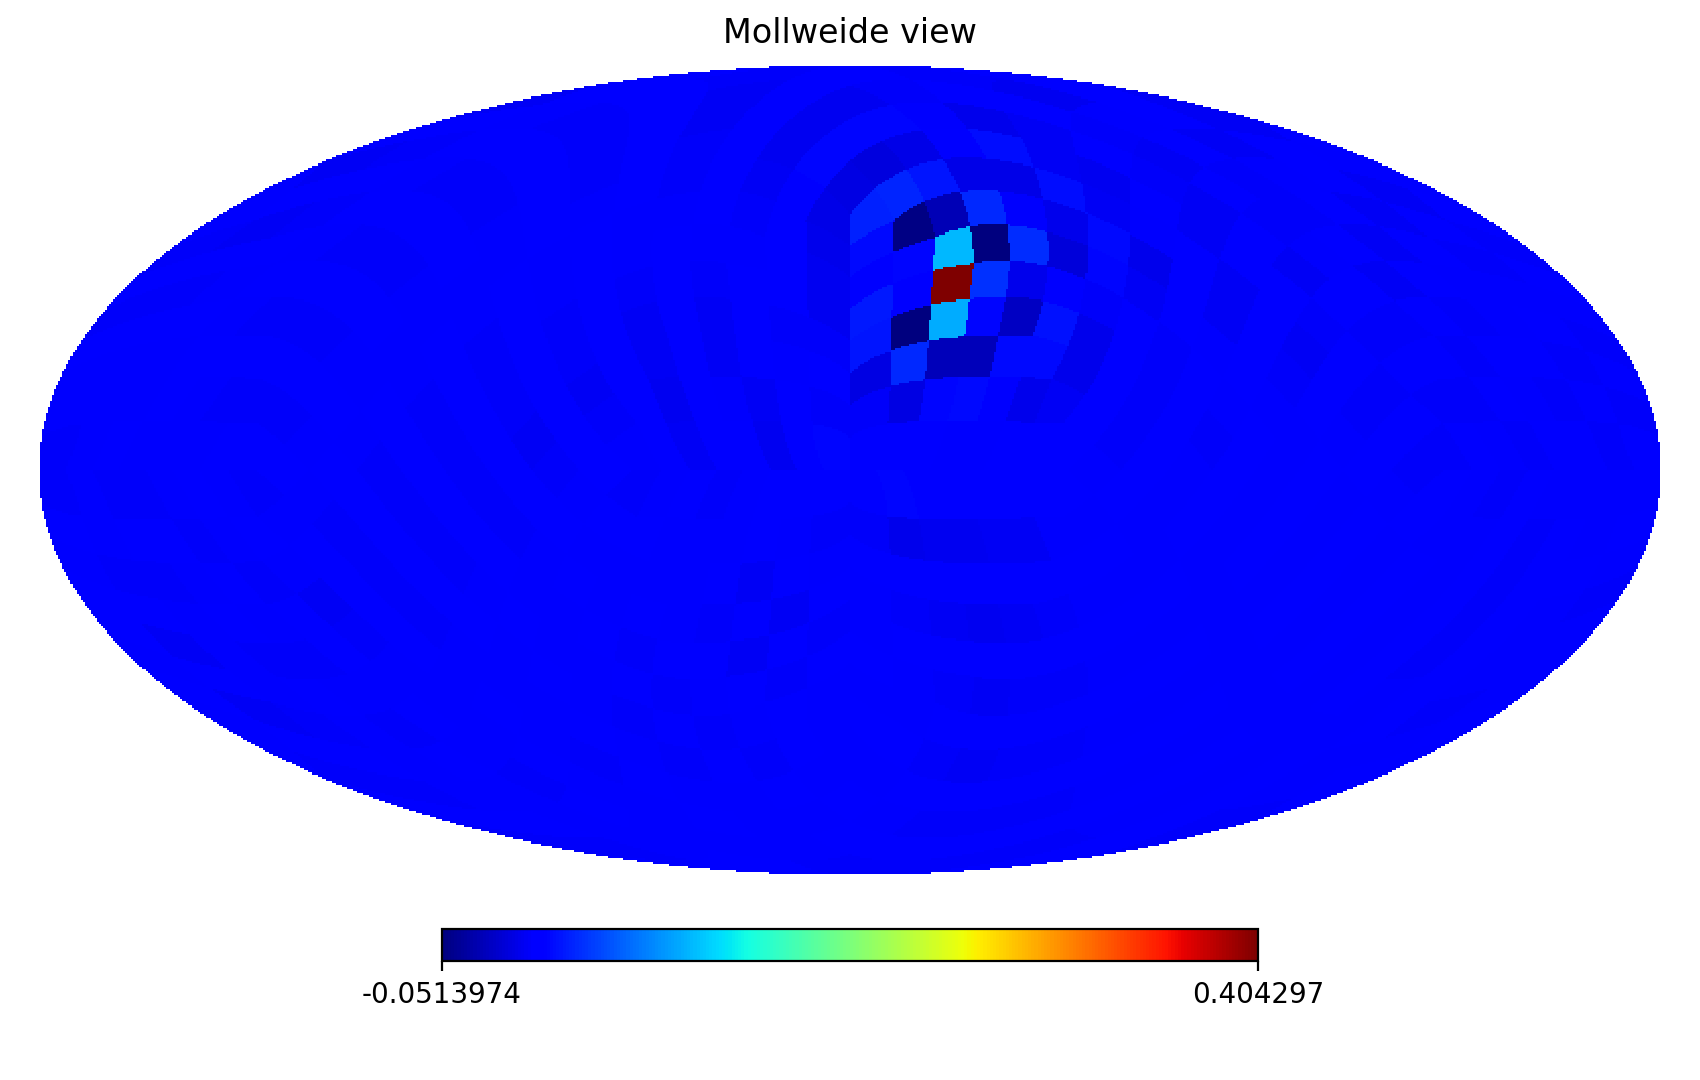

<IPython.core.display.Javascript object>


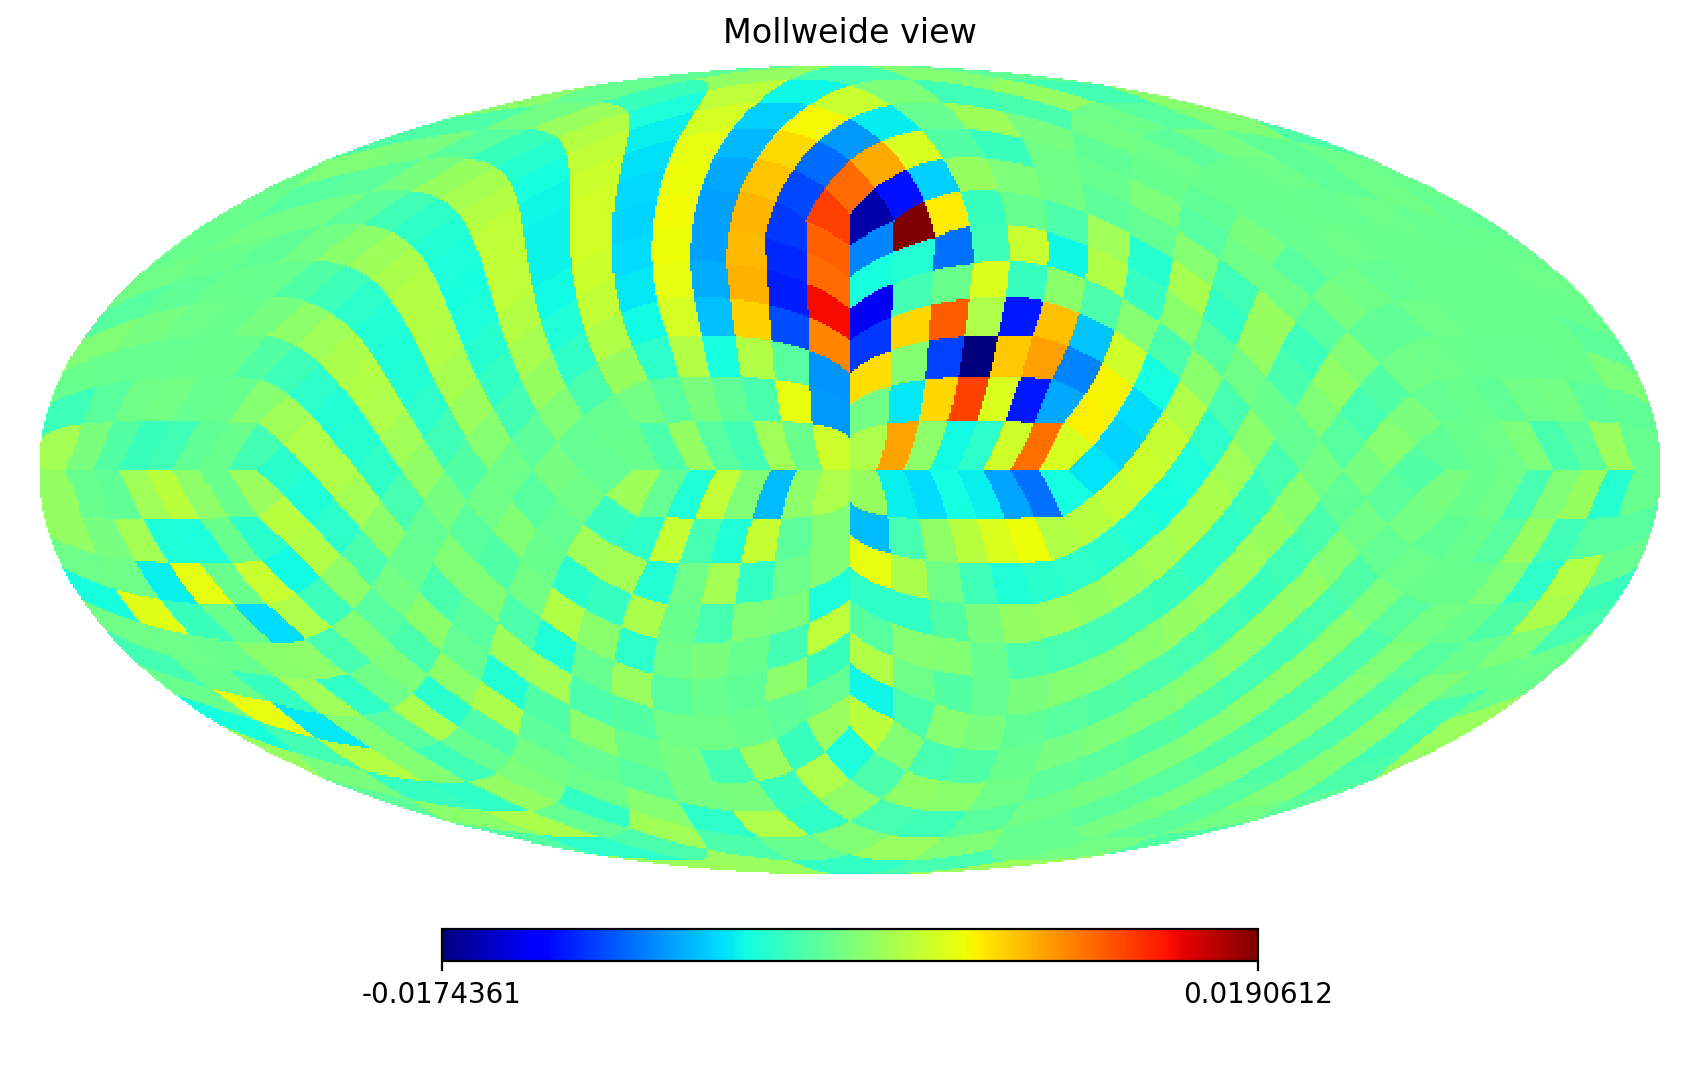

In [3]:
mr,mi=rker.return_kernel_I(8,pixi=100,lmax=3*8,sample_nside=8)
h.mollview(mr,rot=(0,90))
h.mollview(mi,rot=(0,90))

In [4]:
nside=8 ; lmax=2*nside ;lmin=2
upnside=nside
pix=arange(h.nside2npix(nside))
ell=arange(3*nside+1)
beta0=min(180,180*24./lmax)
xsize=400 ; reso=1.5*beta0*60./xsize

y=rk.real_space_queb_kernels(nside,tmax=180.,maxlmax=lmax,sampling=2500)
y.calc_qu2eb_rad_kernel(lmax,lmin)
y.calc_qu2queb_rad_kernel(lmax,lmin)
y.setup_fn_rad_ker()


fl=ones(3*nside+1,float) ; fl[:lmin]=0 ; fl[lmax+1:]=0.
wl=sqrt((2.*ell+1.)/(4.*pi))*y.omega*0.5 ; wl=wl*fl*exp(-ell/(2*32.**2.))

In [5]:
fl=ones(3*nside+1,float) ; fl[:lmin]=0 ; fl[lmax+1:]=0.
wl=sqrt((2.*ell+1.)/(4.*pi))*y.omega*0.5 ; wl=wl*fl*exp(ell**0.5/(2*1.5**2.))

<IPython.core.display.Javascript object>


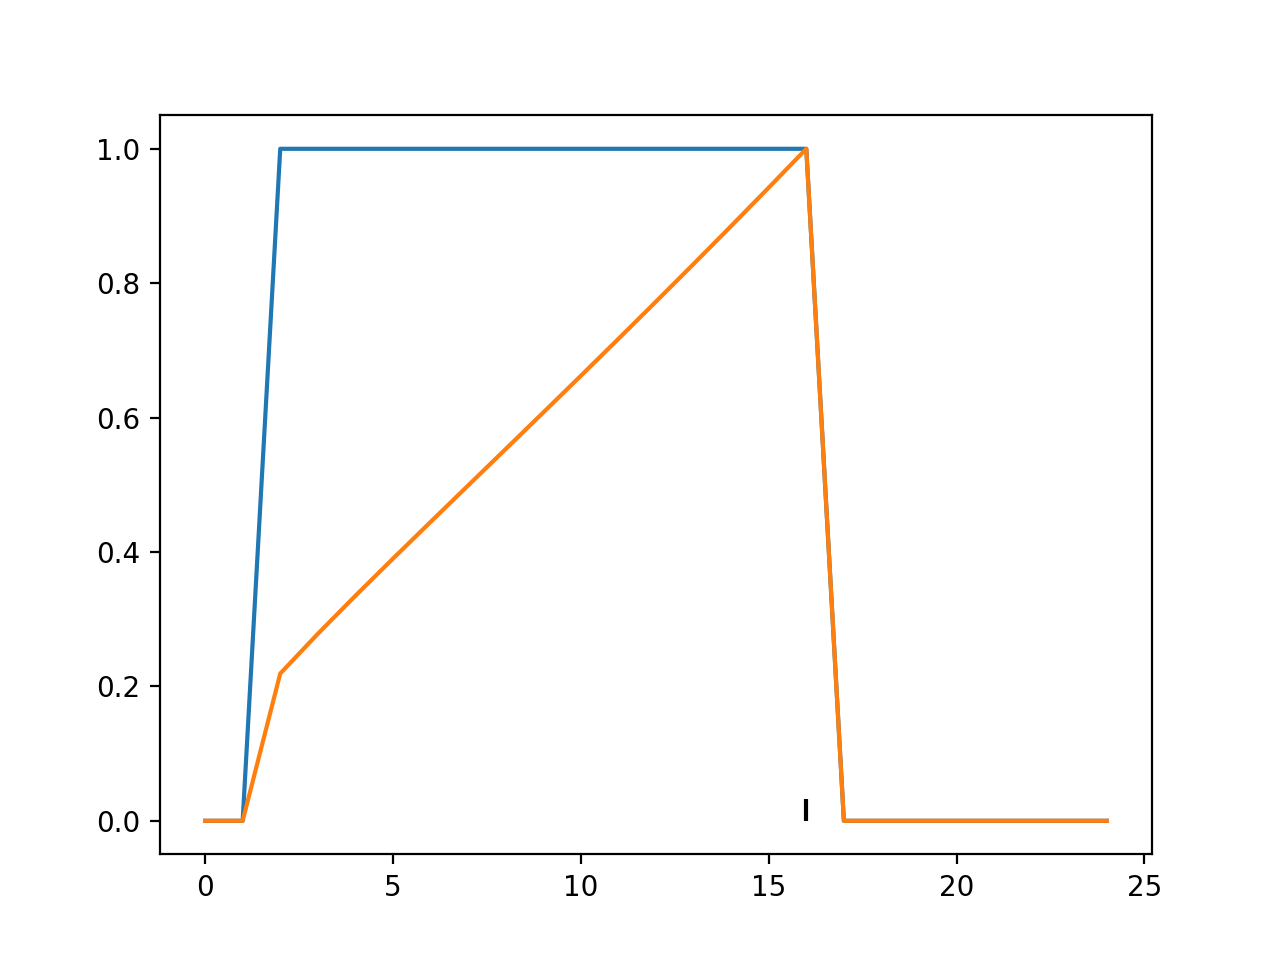

In [6]:
figure()
plot(ell,fl)
plot(ell,wl/max(wl))
vlines(lmax,0,max(wl))
#xlim(lmax-5,lmax+5)

In [7]:
mr=zeros(h.nside2npix(nside),float)
mi=zeros(h.nside2npix(nside),float)
almr0=h.map2alm(mr,lmax=lmax,mmax=lmax)
almi0=h.map2alm(mi,lmax=lmax,mmax=lmax)
almsize=h.Alm.getsize(lmax,lmax)
for i in range(almsize):
    l,m=h.Alm.getlm(lmax,i)
    if l>1 and m==2:
        almr0[i]=complex(1.,0.)*wl[l]
        almi0[i]=complex(0.,1.)*wl[l]
mr=h.alm2map(almr0,nside,lmax=lmax,mmax=lmax,verbose=False)
mi=h.alm2map(almi0,nside,lmax=lmax,mmax=lmax,verbose=False)
normr=max(abs(mr))
normi=max(abs(mi))

#h.gnomview(mr,rot=(0,90),xsize=xsize,reso=reso)
#h.gnomview(mi,rot=(0,90),xsize=xsize,reso=reso)

Pix i:  336
85.2198081528 0.0
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.00148010253906


<IPython.core.display.Javascript object>


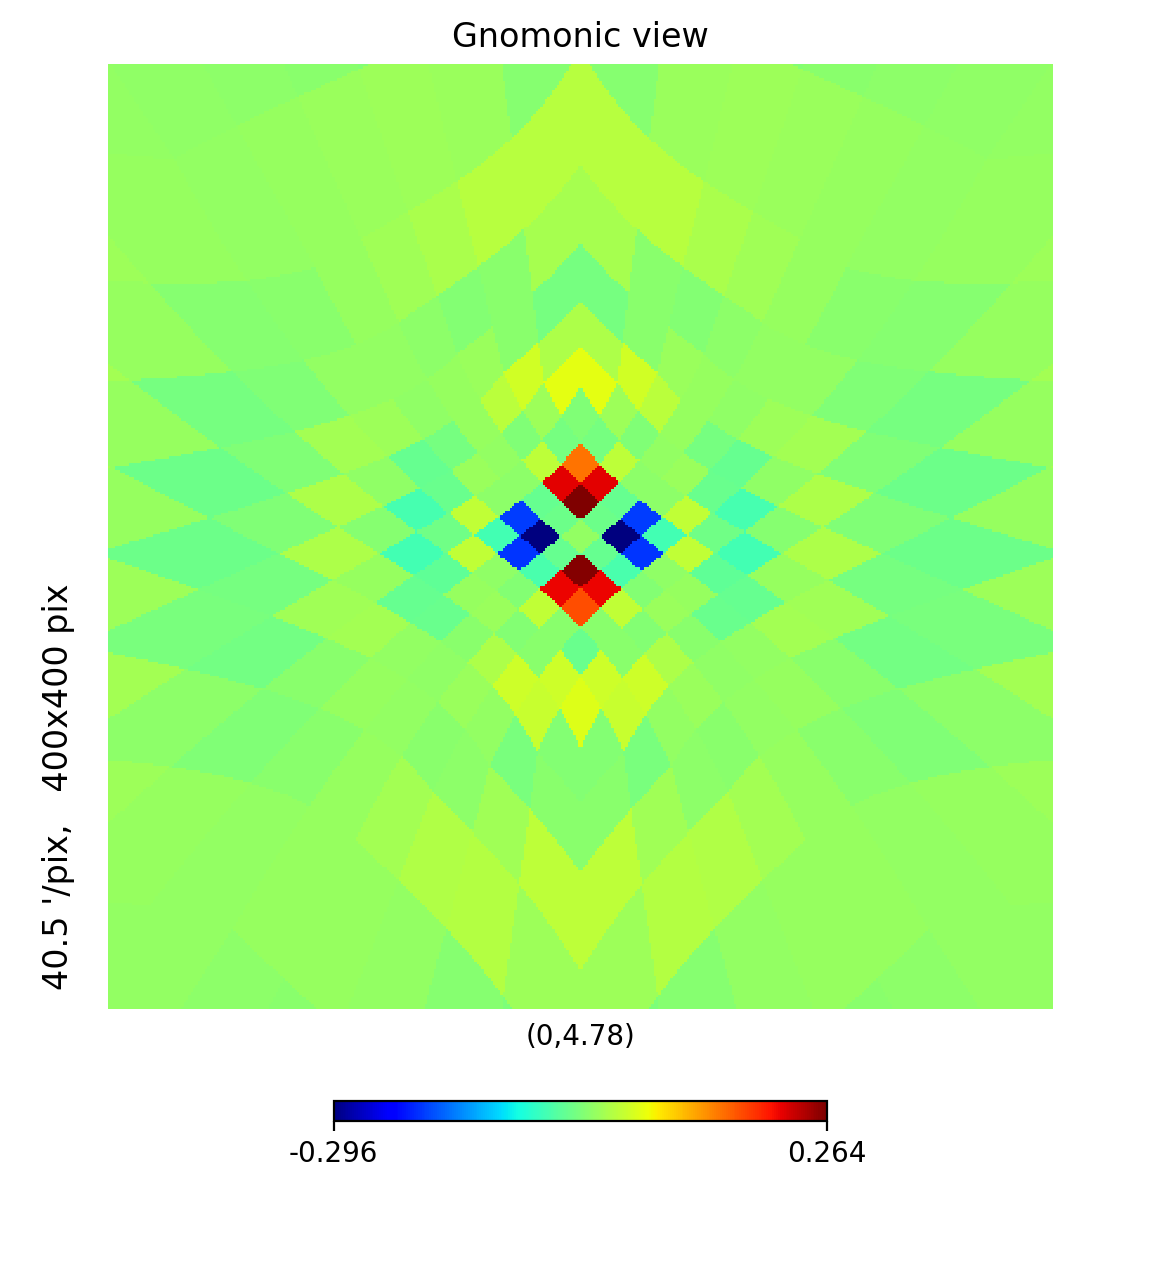

<IPython.core.display.Javascript object>


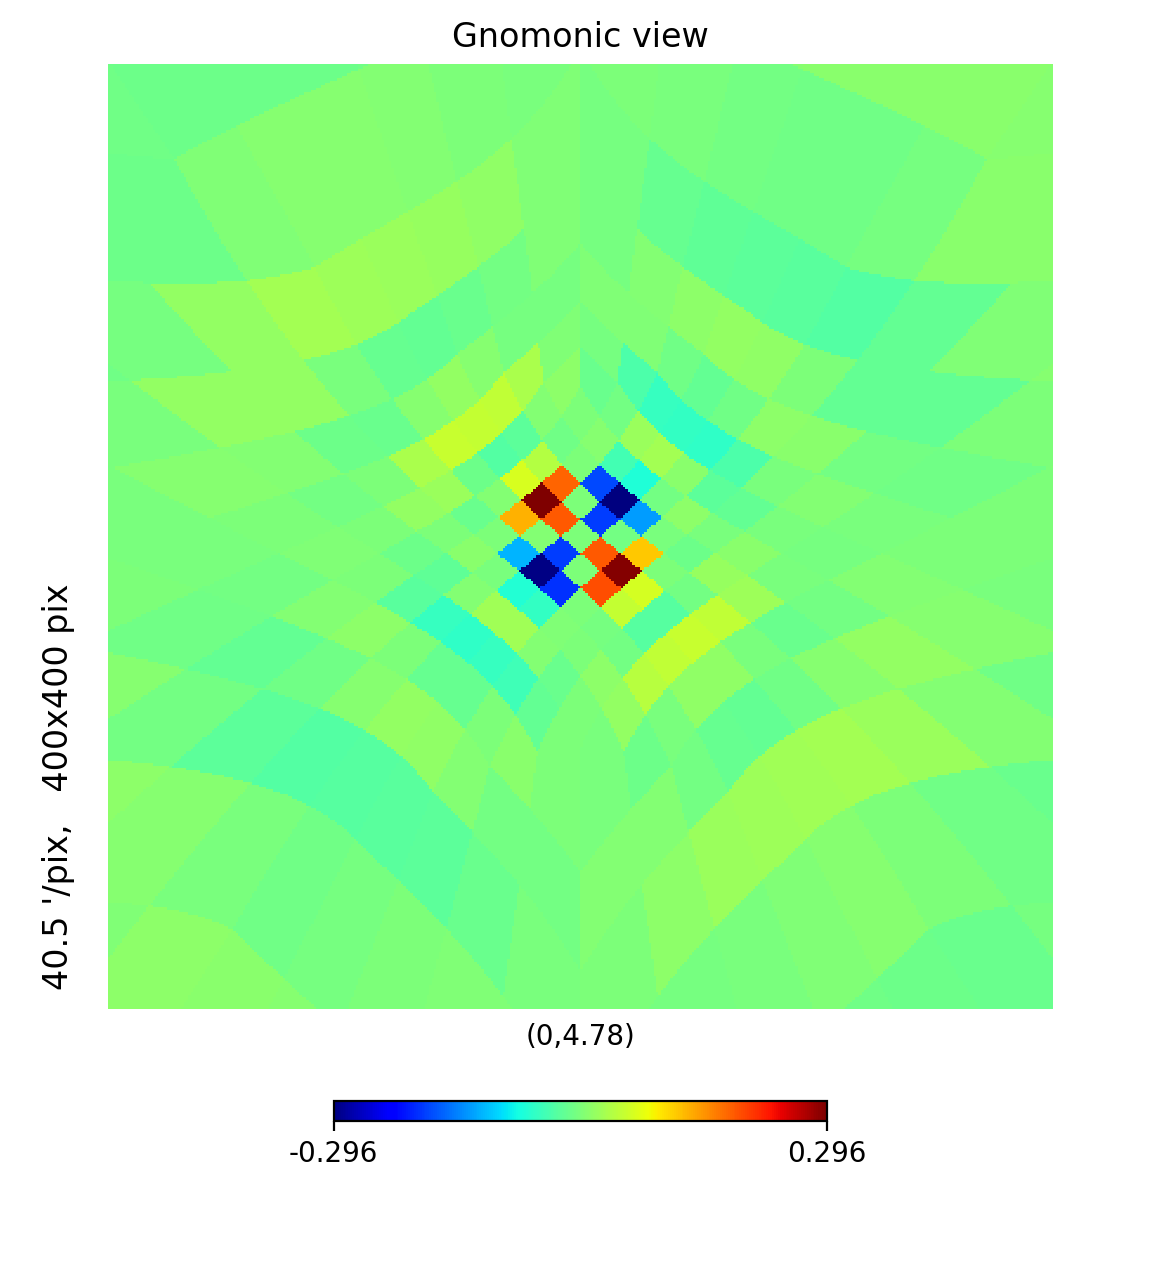

In [8]:
almr=zeros(almsize,complex)
almi=zeros(almsize,complex)
almr[:]=almr0[:]
almi[:]=almi0[:]

thetai=90.*pi/180. ;  phii=0.*pi/180
pixi=h.ang2pix(nside,thetai,phii) ; print "Pix i: ",pixi
thetai,phii=h.pix2ang(nside,pixi) ; print thetai*180/pi,phii*180./pi

t1=time.time()
h.rotate_alm(almr,0.,thetai,phii,lmax=lmax)
h.rotate_alm(almi,0.,thetai,phii,lmax=lmax)
rmr=h.alm2map(almr,nside)
rmi=h.alm2map(almi,nside)
print time.time()-t1
#h.mollview(rmr,rot=(phii*180./pi,90-thetai*180./pi))
#h.mollview(rmi,rot=(phii*180./pi,90-thetai*180./pi))
h.gnomview(rmr,rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)
h.gnomview(rmi,rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


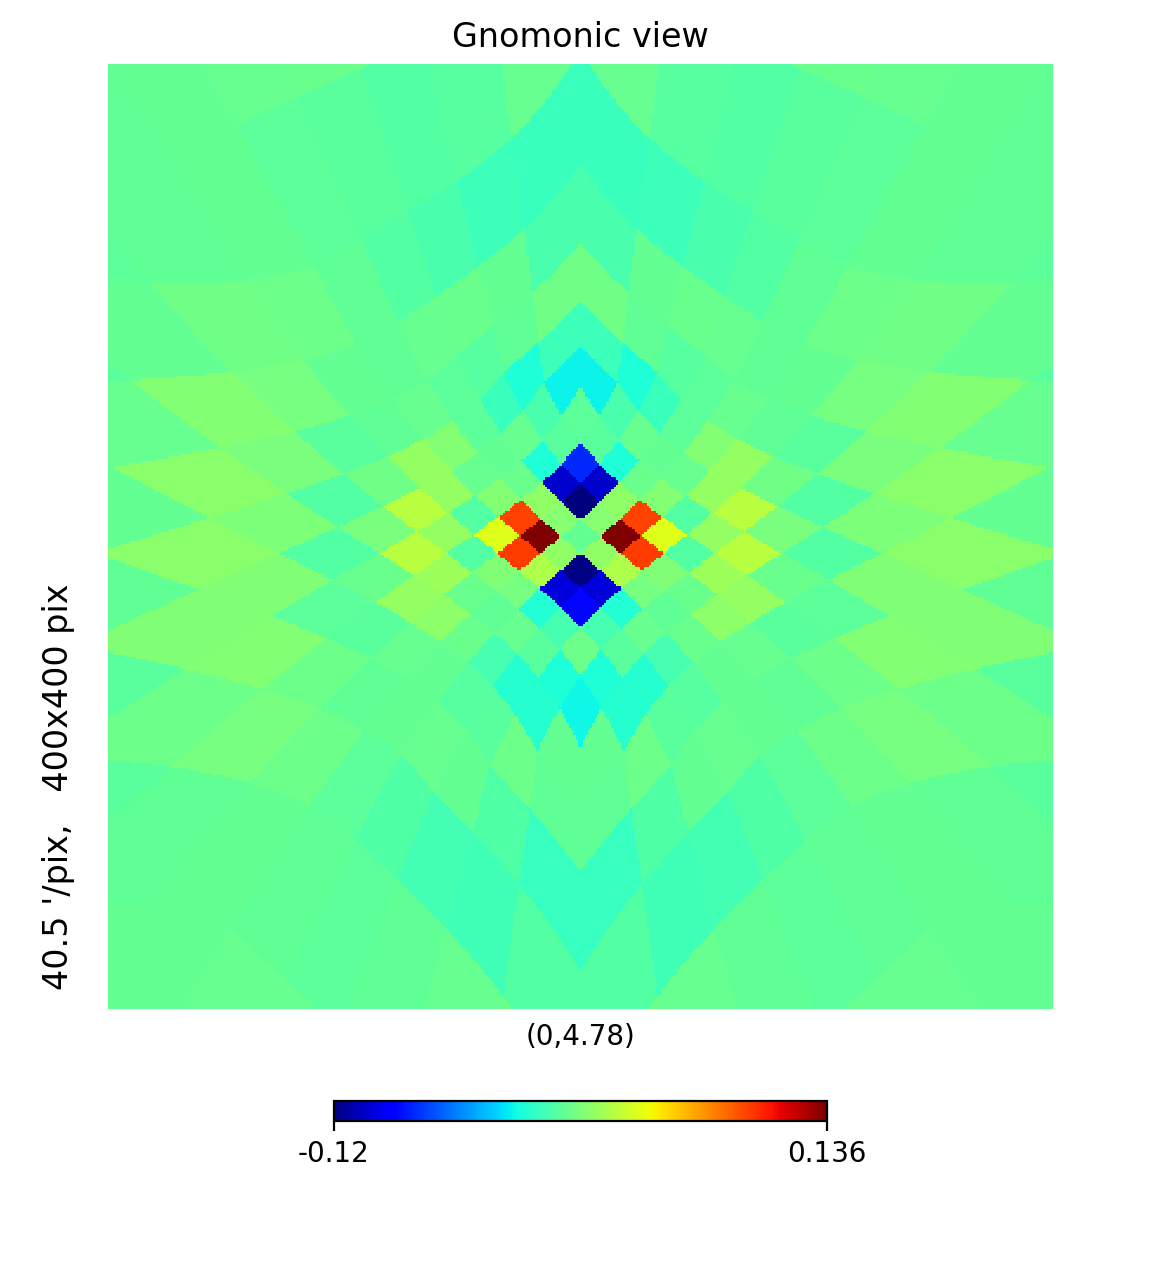

<IPython.core.display.Javascript object>


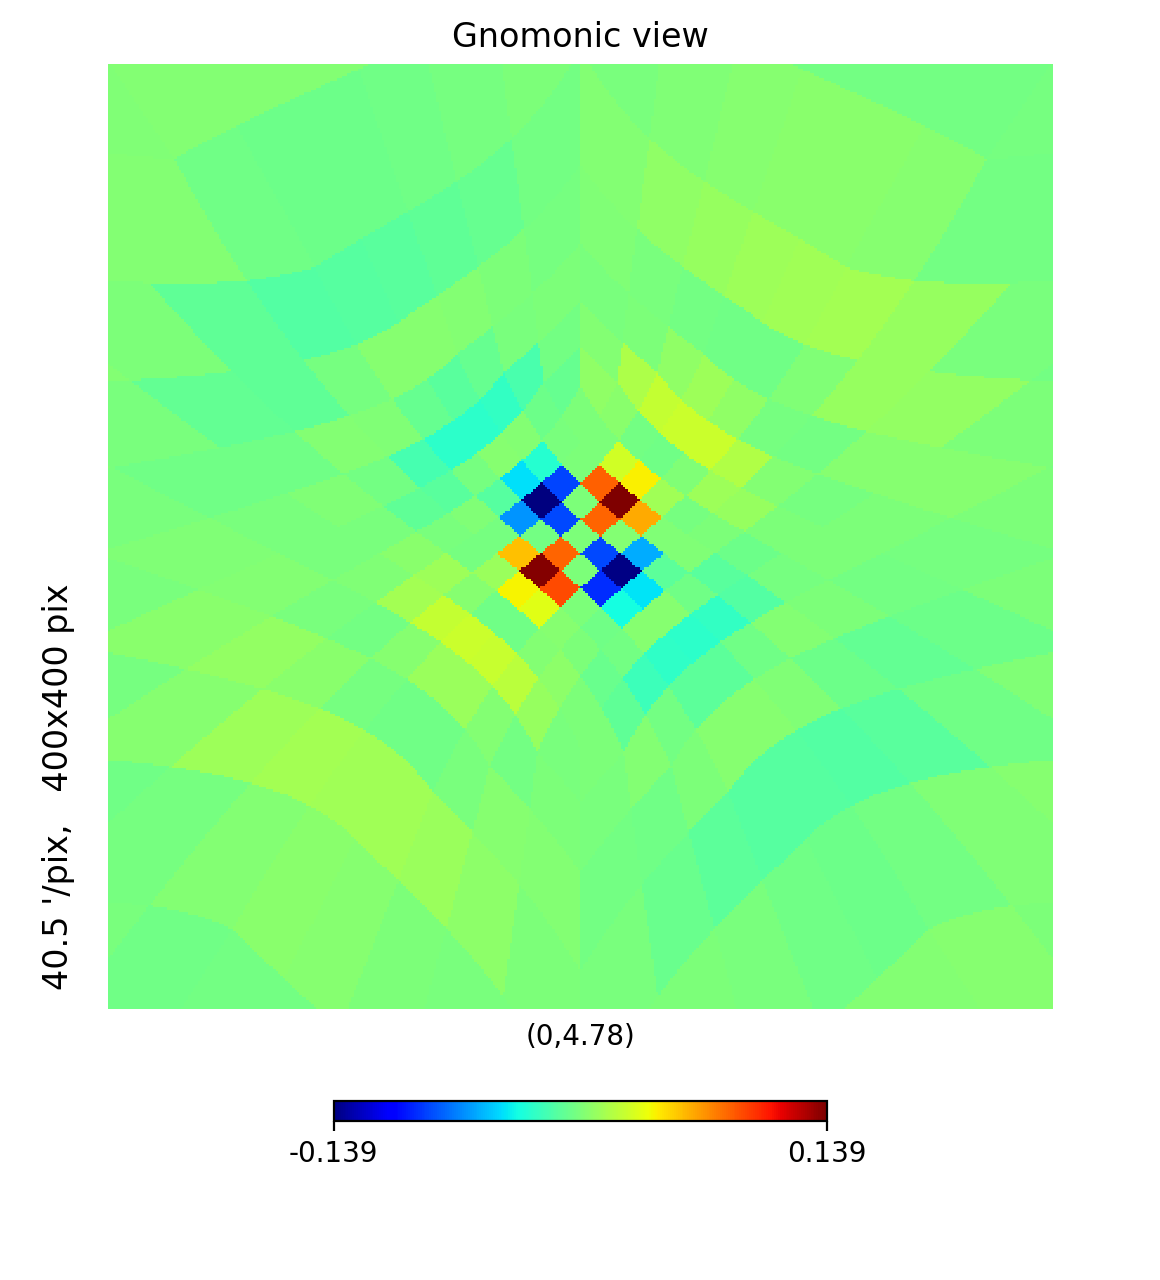

In [9]:
npix=h.nside2npix(nside)
tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][pixi]=1.
almt=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(almt[i],fl,inplace=True) for i in arange(3)]
t=h.alm2map(alm,nside,pol=False)
mrg=t[1]
mig=t[2]

#h.mollview(mrg,rot=(phii*180./pi,90-thetai*180./pi))
#h.mollview(mig,rot=(phii*180./pi,90-thetai*180./pi))
h.gnomview(mrg,rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)
h.gnomview(mig,rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)

In [10]:
i=h.Alm.getidx(lmax,12,2)
print almt[1][i]
print almr[i]

(-0.00264072254653-9.4819793615e-20j)
(0.00569643611255+0j)


1.0
0.00336194038391


<IPython.core.display.Javascript object>


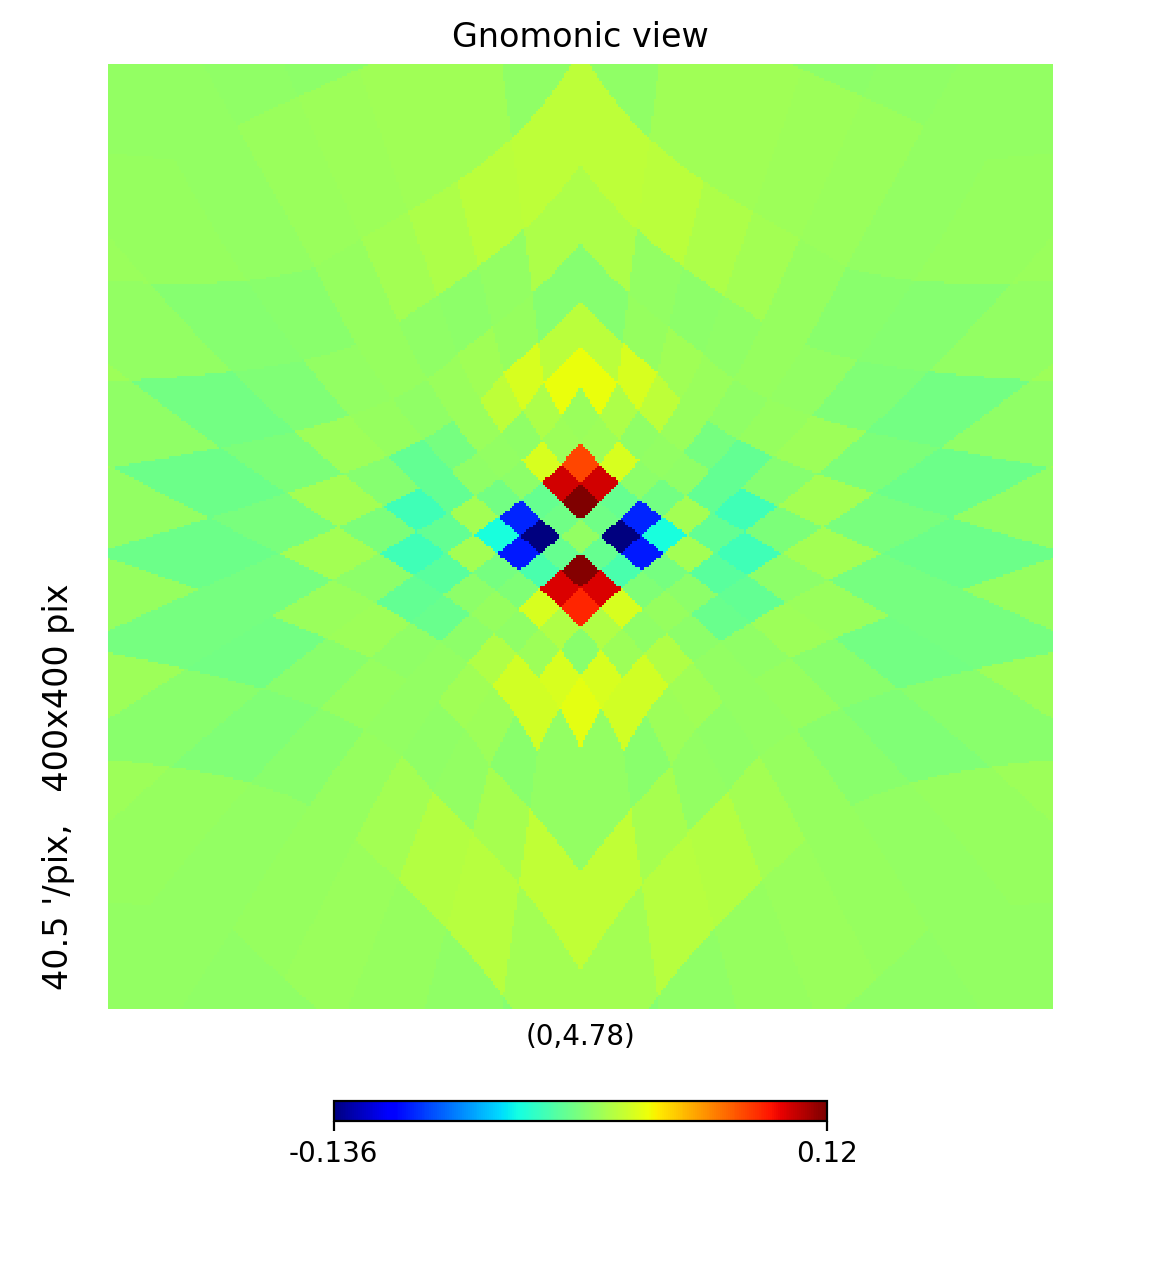

<IPython.core.display.Javascript object>


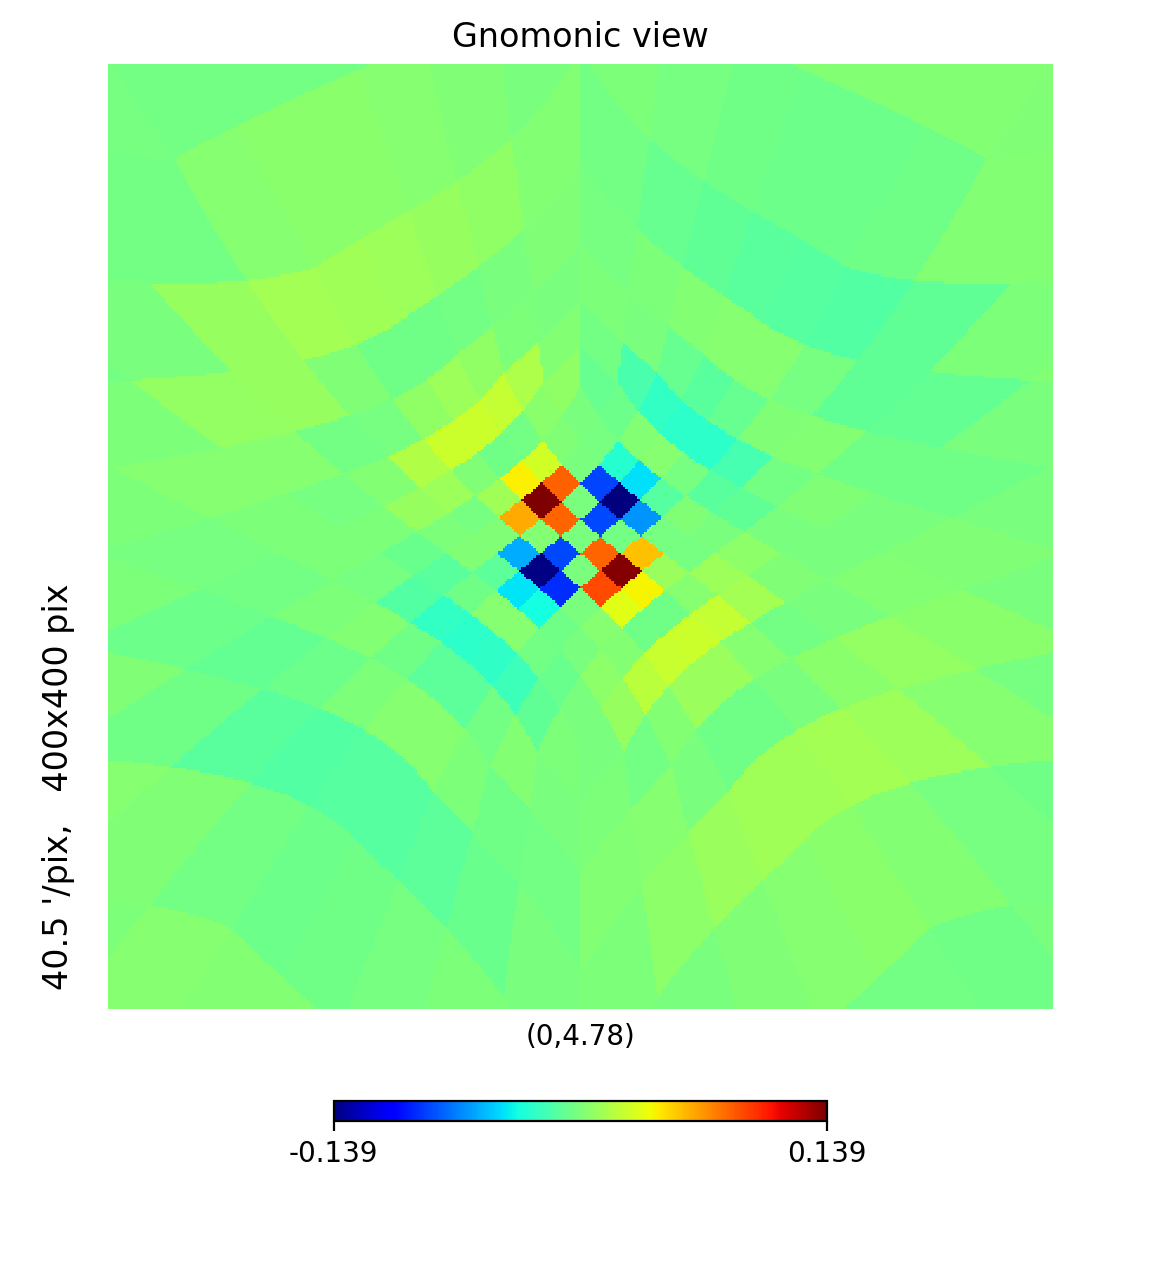

In [11]:
t1=time.time()
omr=zeros(npix,float) ; omi=zeros(npix,float)
norm=(nside**2.)/(upnside**2.) ; print norm
a,b,g,pix2=y.return_euler_angles_new(upnside,pixi,180.)
omr[pix2]=cos(2.*a)*y.fn_rad_ker(b)*norm ; omi[pix2]=sin(2.*a)*y.fn_rad_ker(b)*norm
print time.time()-t1
#h.mollview(omr,rot=(phii*180./pi,90-thetai*180./pi))
#h.mollview(omi,rot=(phii*180./pi,90-thetai*180./pi))
h.gnomview(omr,rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)
h.gnomview(omi,rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)

<IPython.core.display.Javascript object>


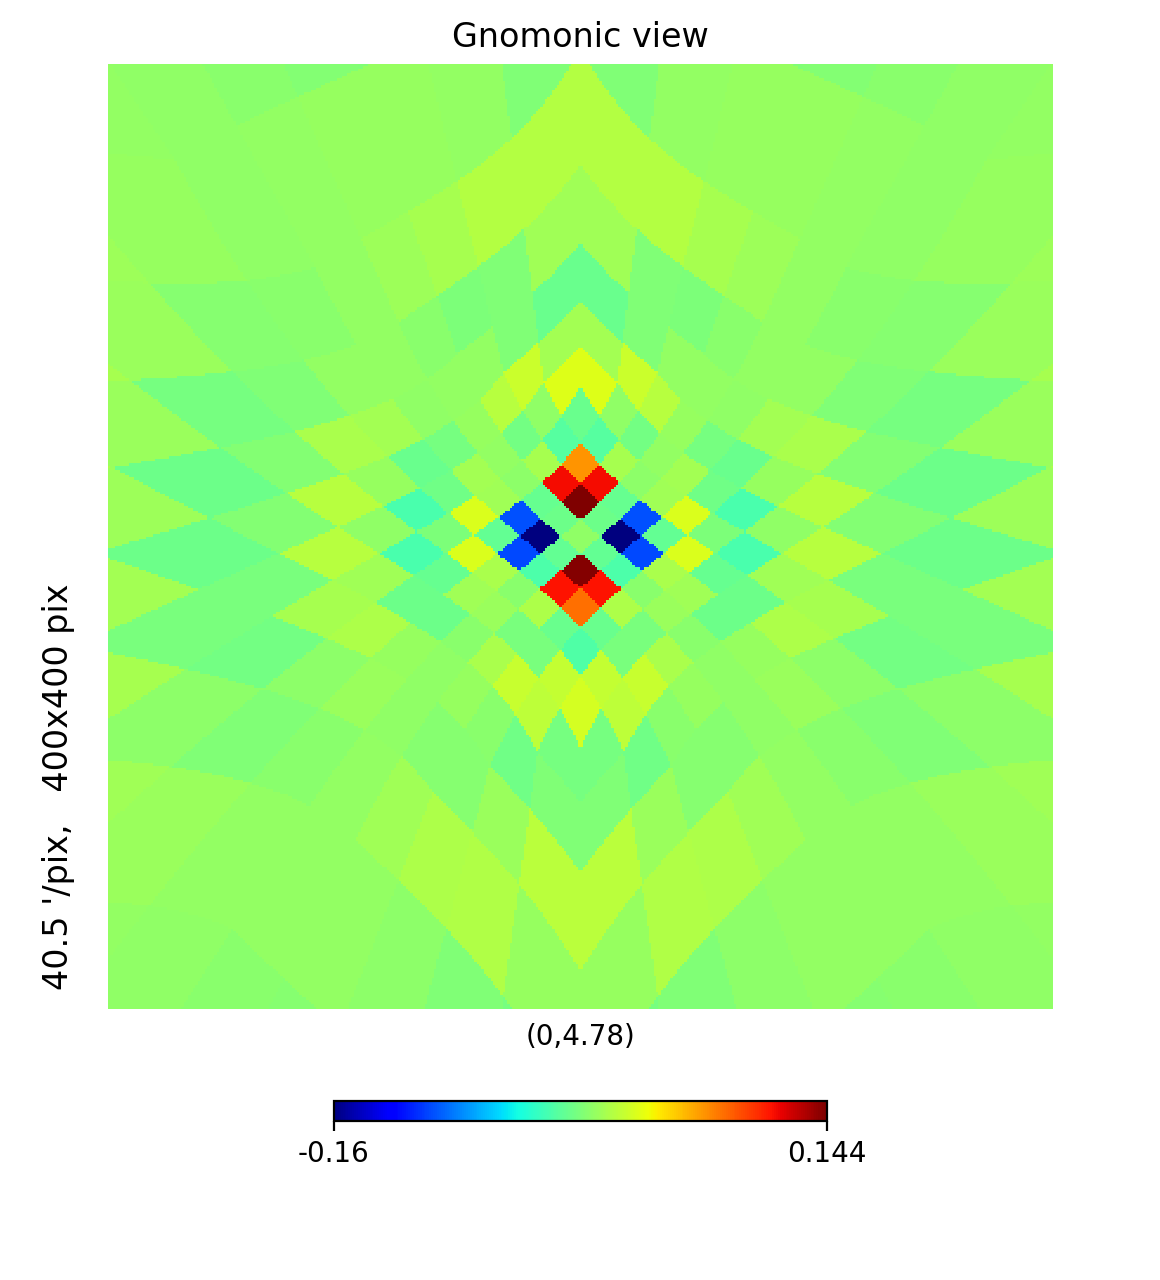

<IPython.core.display.Javascript object>


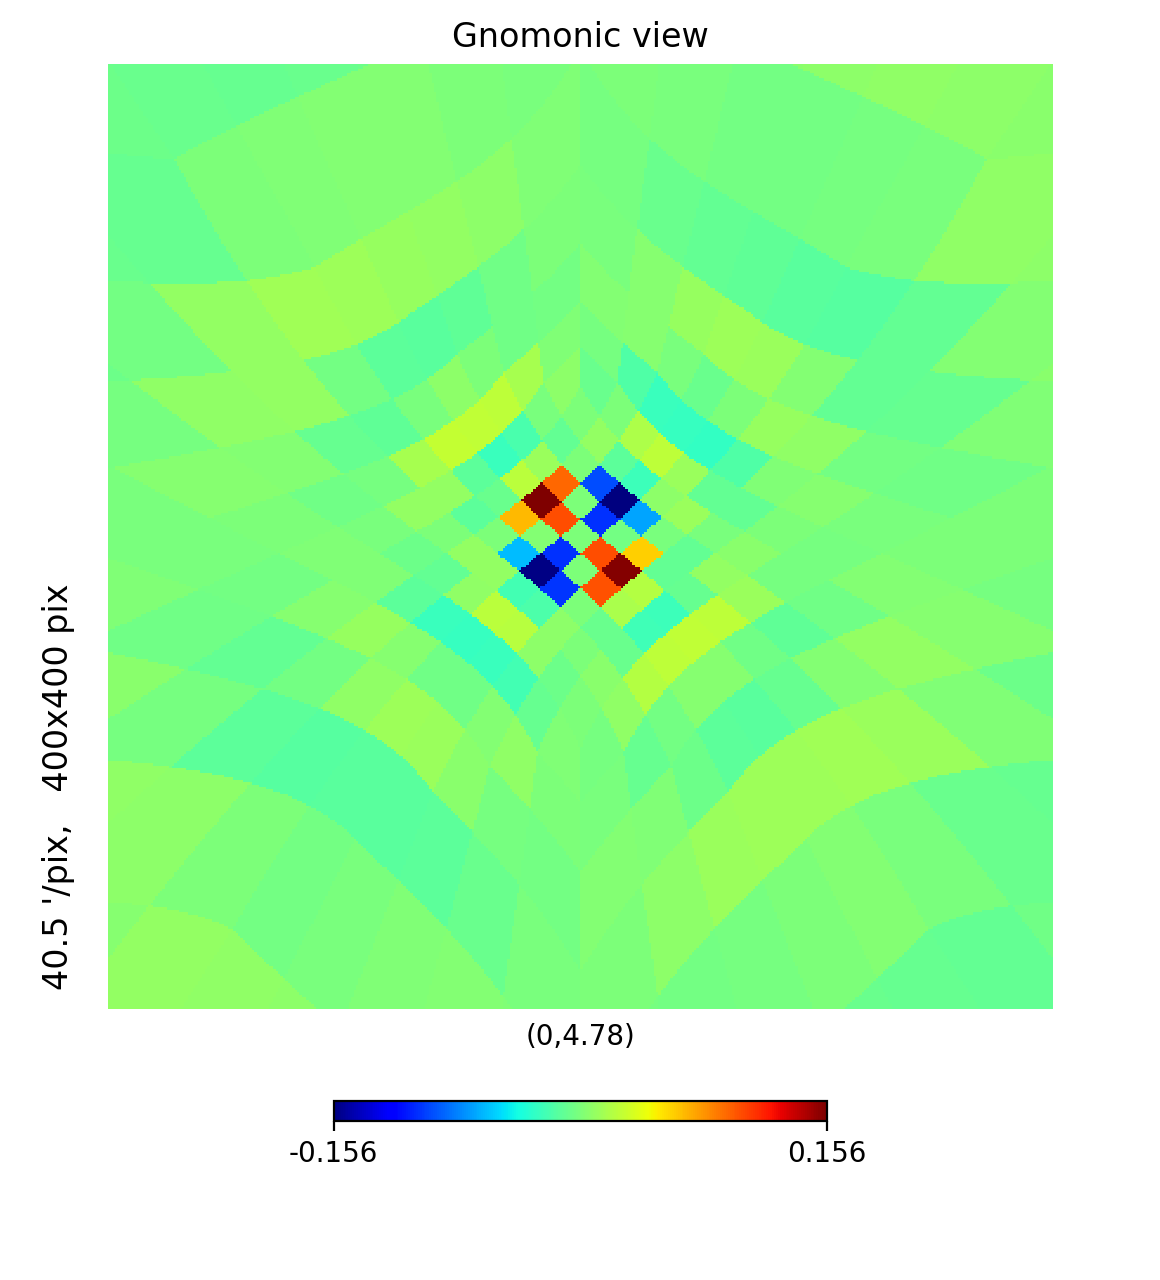

In [12]:
#h.mollview((mrg+rmr),rot=(phii*180./pi,90-180*thetai/pi))
#h.mollview((mig+rmi),rot=(phii*180./pi,90-180*thetai/pi))
h.gnomview((mrg+rmr),rot=(phii*180./pi,90-180*thetai/pi),xsize=xsize,reso=reso)
h.gnomview((mig+rmi),rot=(phii*180./pi,90-180*thetai/pi),xsize=xsize,reso=reso)

<IPython.core.display.Javascript object>


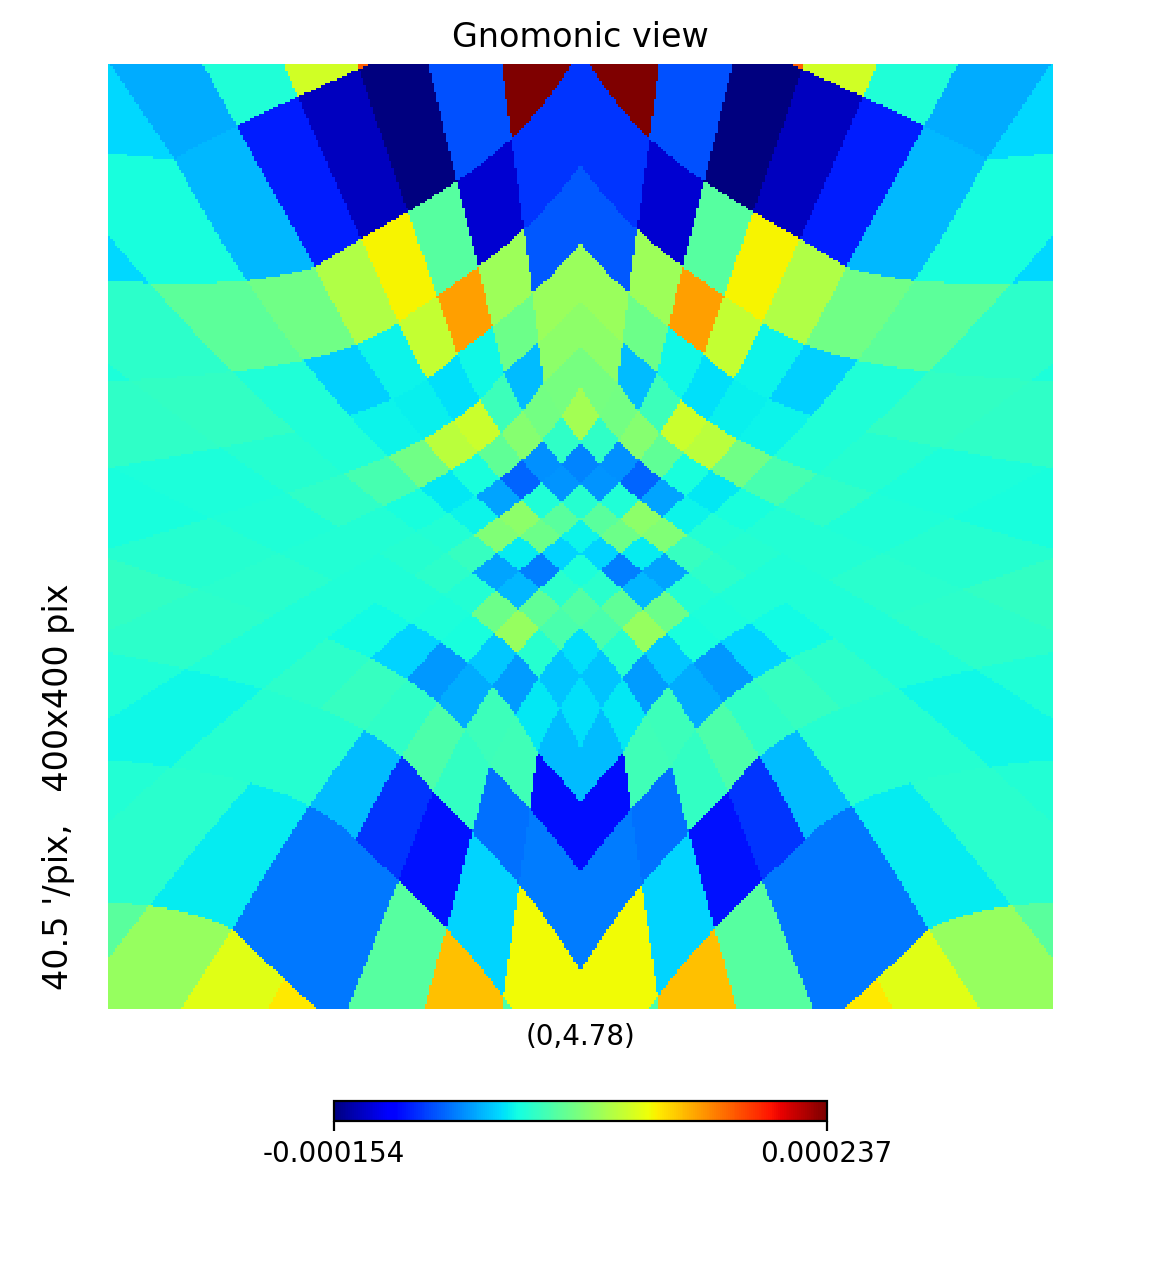

<IPython.core.display.Javascript object>


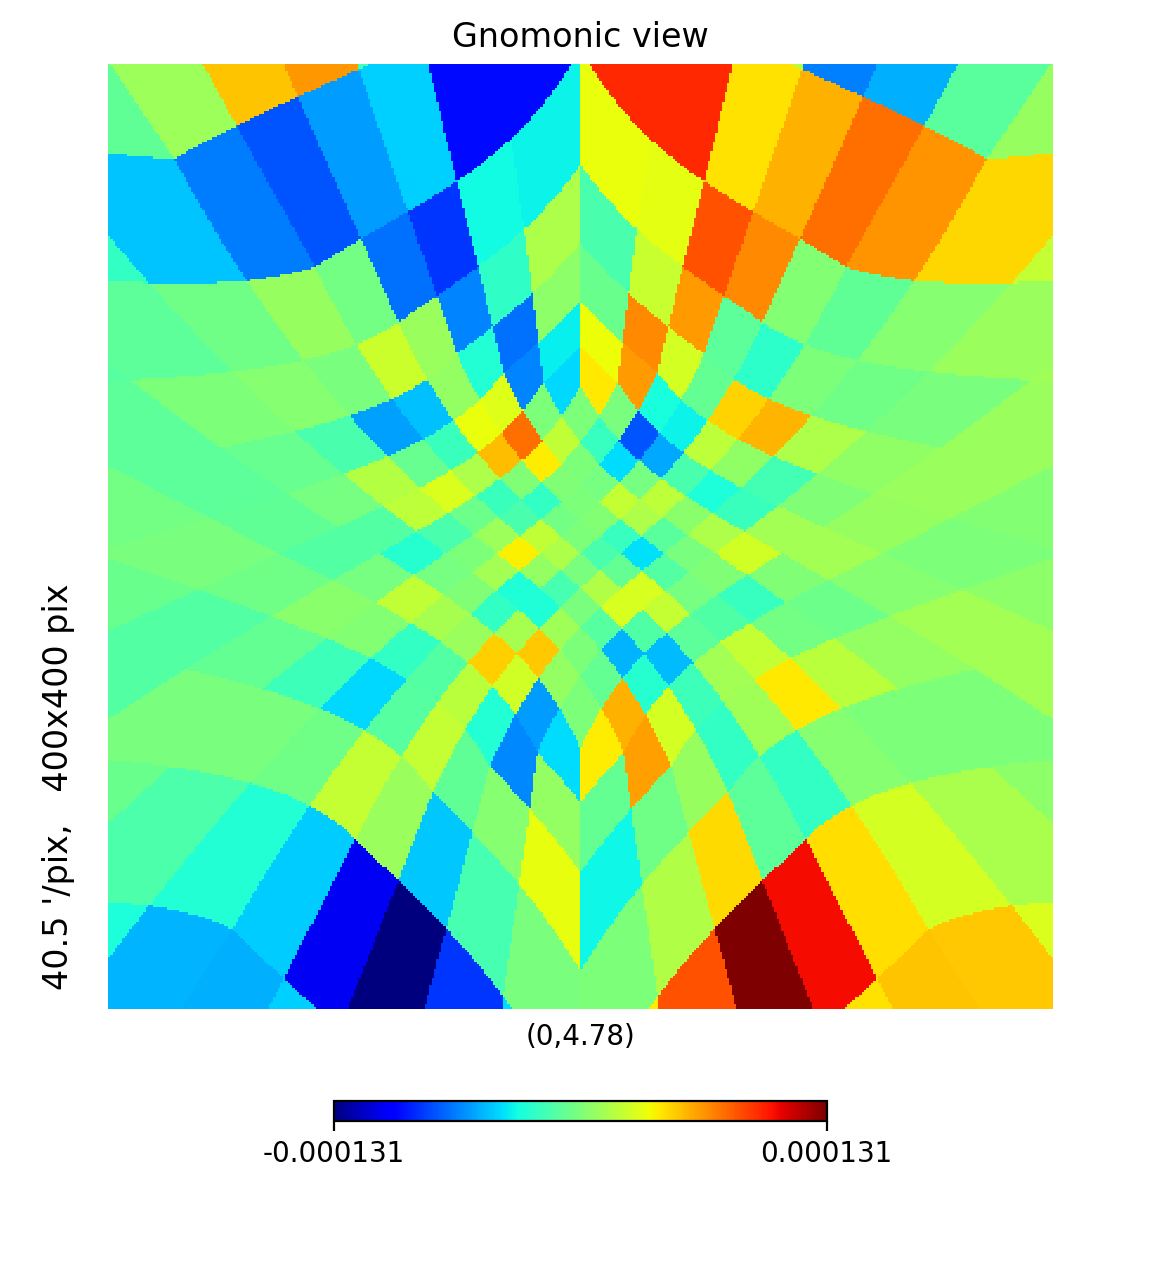

In [13]:
h.gnomview((mrg+omr),rot=(phii*180./pi,90-180*thetai/pi),xsize=xsize,reso=reso)
h.gnomview((mig+omi),rot=(phii*180./pi,90-180*thetai/pi),xsize=xsize,reso=reso)

<IPython.core.display.Javascript object>


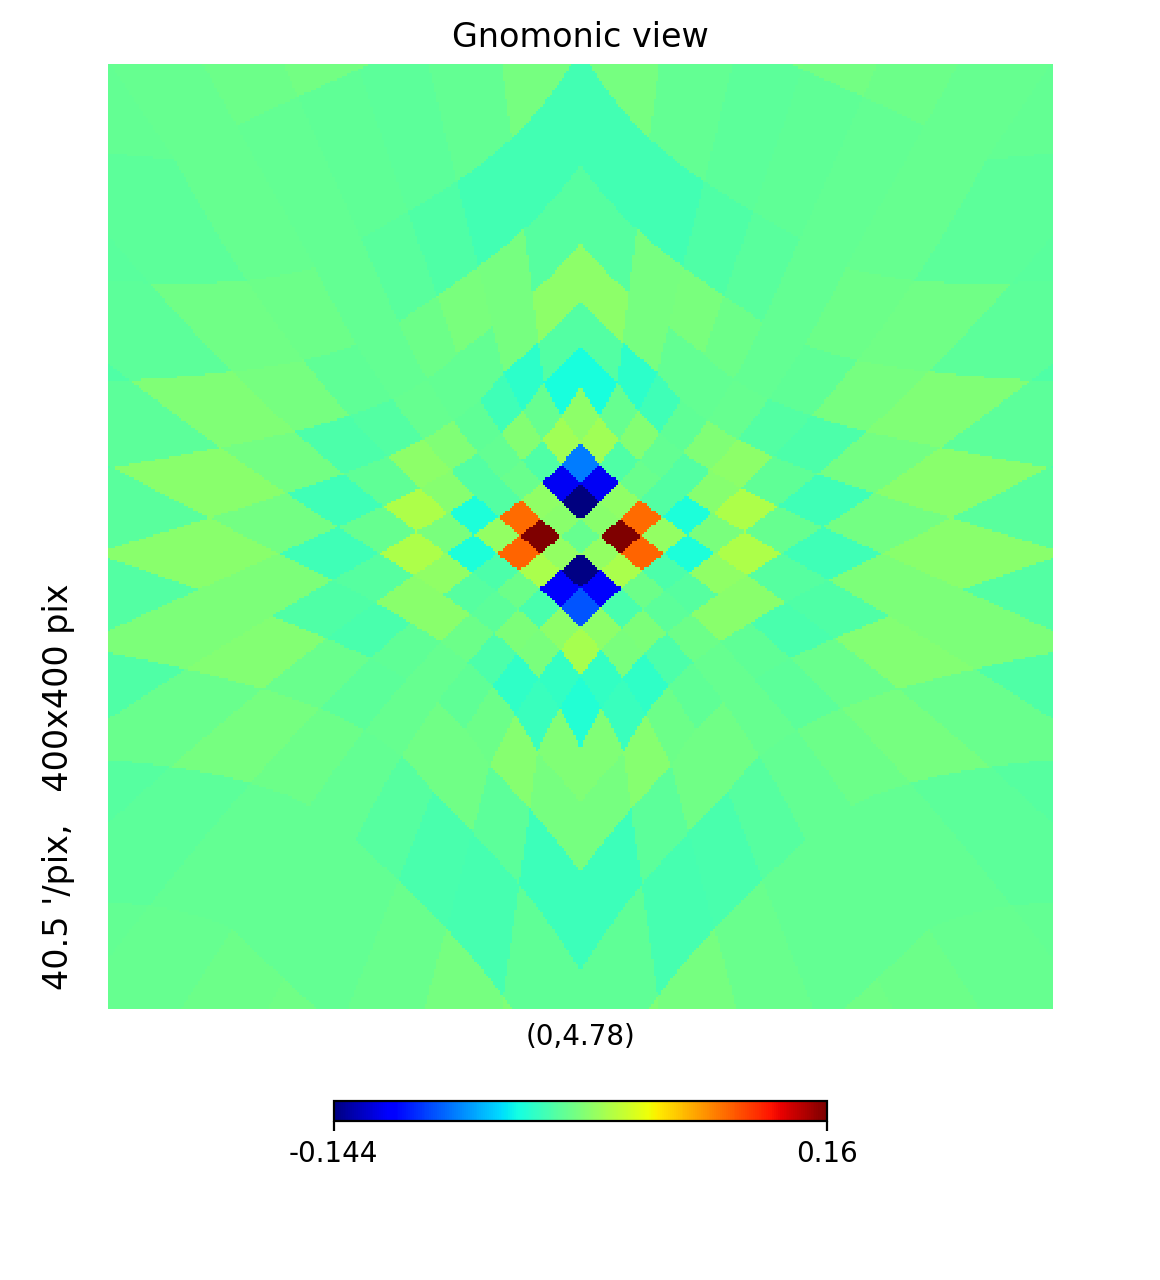

<IPython.core.display.Javascript object>


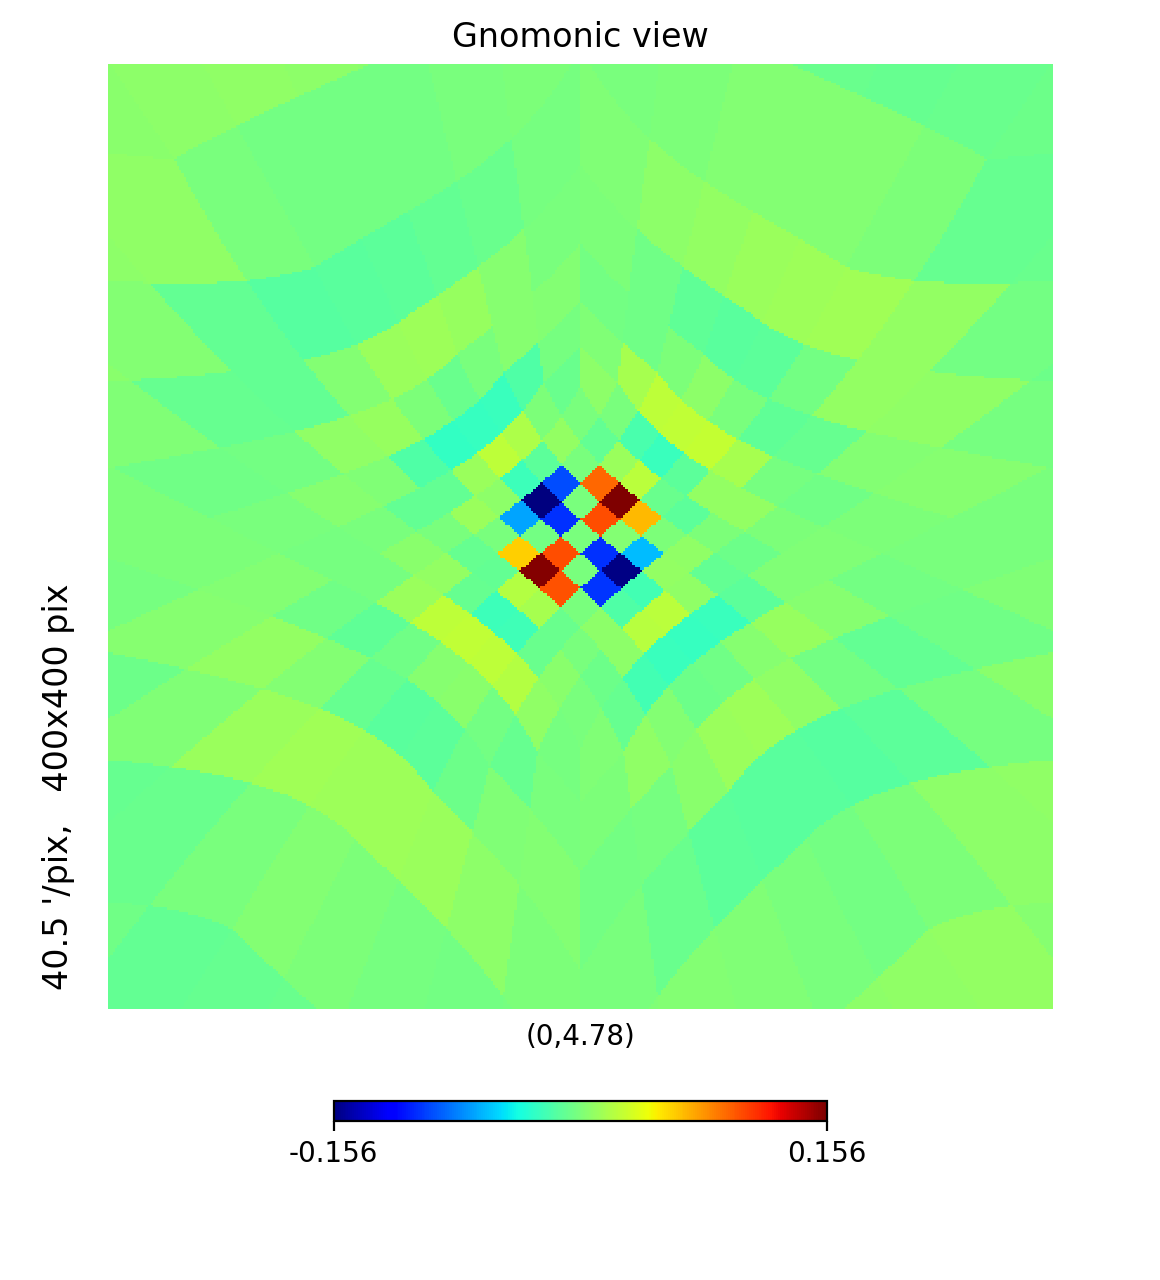

In [14]:
#h.mollview(omr-rmr,rot=(phii*180./pi,90-thetai*180./pi))
#h.mollview(omi-rmi,rot=(phii*180./pi,90-thetai*180./pi))
h.gnomview(omr-rmr,rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)
h.gnomview(omi-rmi,rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)

In [15]:
nside=64 ; lmax=1.*nside
npix=h.nside2npix(nside)

theta1=47.*pi/180. ; phi1=45.*pi/180.
pix1=h.ang2pix(nside,theta1,phi1)
theta1,phi1=h.pix2ang(nside,pix1) ; print theta1*180/pi,phi1*180./pi
tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][pix1]=1.
almt=h.map2alm(tqu,lmax=lmax,pol=True) 
t=h.alm2map(almt,nside,pol=False)
mrg1=t[1] ; mig1=t[2]

theta2=90.*pi/180. ; phi2=45.*pi/180.
pix2=h.ang2pix(nside,theta2,phi2)
theta2,phi2=h.pix2ang(nside,pix2) ; print theta2*180/pi,phi2*180./pi
tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][pix2]=1.
almt=h.map2alm(tqu,lmax=lmax,pol=True) 
t=h.alm2map(almt,nside,pol=False)
mrg2=t[1] ; mig2=t[2]

a,b,g,tpix=y.return_euler_angles_new(nside,pix1,180.)
rot1z1=g[tpix==pix2][0]
roty1=b[tpix==pix2][0]
rot2z1=a[tpix==pix2][0]
print rot1z1*180./pi,roty1*180./pi,rot2z1*180./pi

almr=h.map2alm(mrg1,lmax=lmax)
h.rotate_alm(almr,an,bn,gn,lmax=lmax)
rmrg=h.alm2map(almr,nside)

47.3901930224 45.0
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
90.0 45.703125
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
179.235684464 42.6144968874 178.961475239


NameError: name 'an' is not defined

In [151]:
#h.mollview(mrg1)
#h.mollview(mrg2,rot=(phi2*180./pi,90-theta2*180./pi))
#h.mollview(rmrg,rot=(phi2*180./pi,90-theta2*180./pi))

In [187]:
a,b,g,tpix=y.return_euler_angles_new(nside,pix1,180.)
rot1z1=g[tpix==pix2][0]
roty1=b[tpix==pix2][0]
rot2z1=a[tpix==pix2][0]
print rot1z1*180./pi,roty1*180./pi,rot2z1*180./pi

an,bn,gn=y.return_euler_ang(theta1,phi1,theta2,phi2)
#an,bn,gn=y.return_euler_ang(0.*pi/180.,0.*pi/180.,90.*pi/180.,45*pi/180.)
print (an*180/pi) ,bn*180./pi,(2.*pi-gn)*180/pi

179.235684464 42.6144968874 178.961475239
1.0385247608 42.6144968874 359.235684464


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


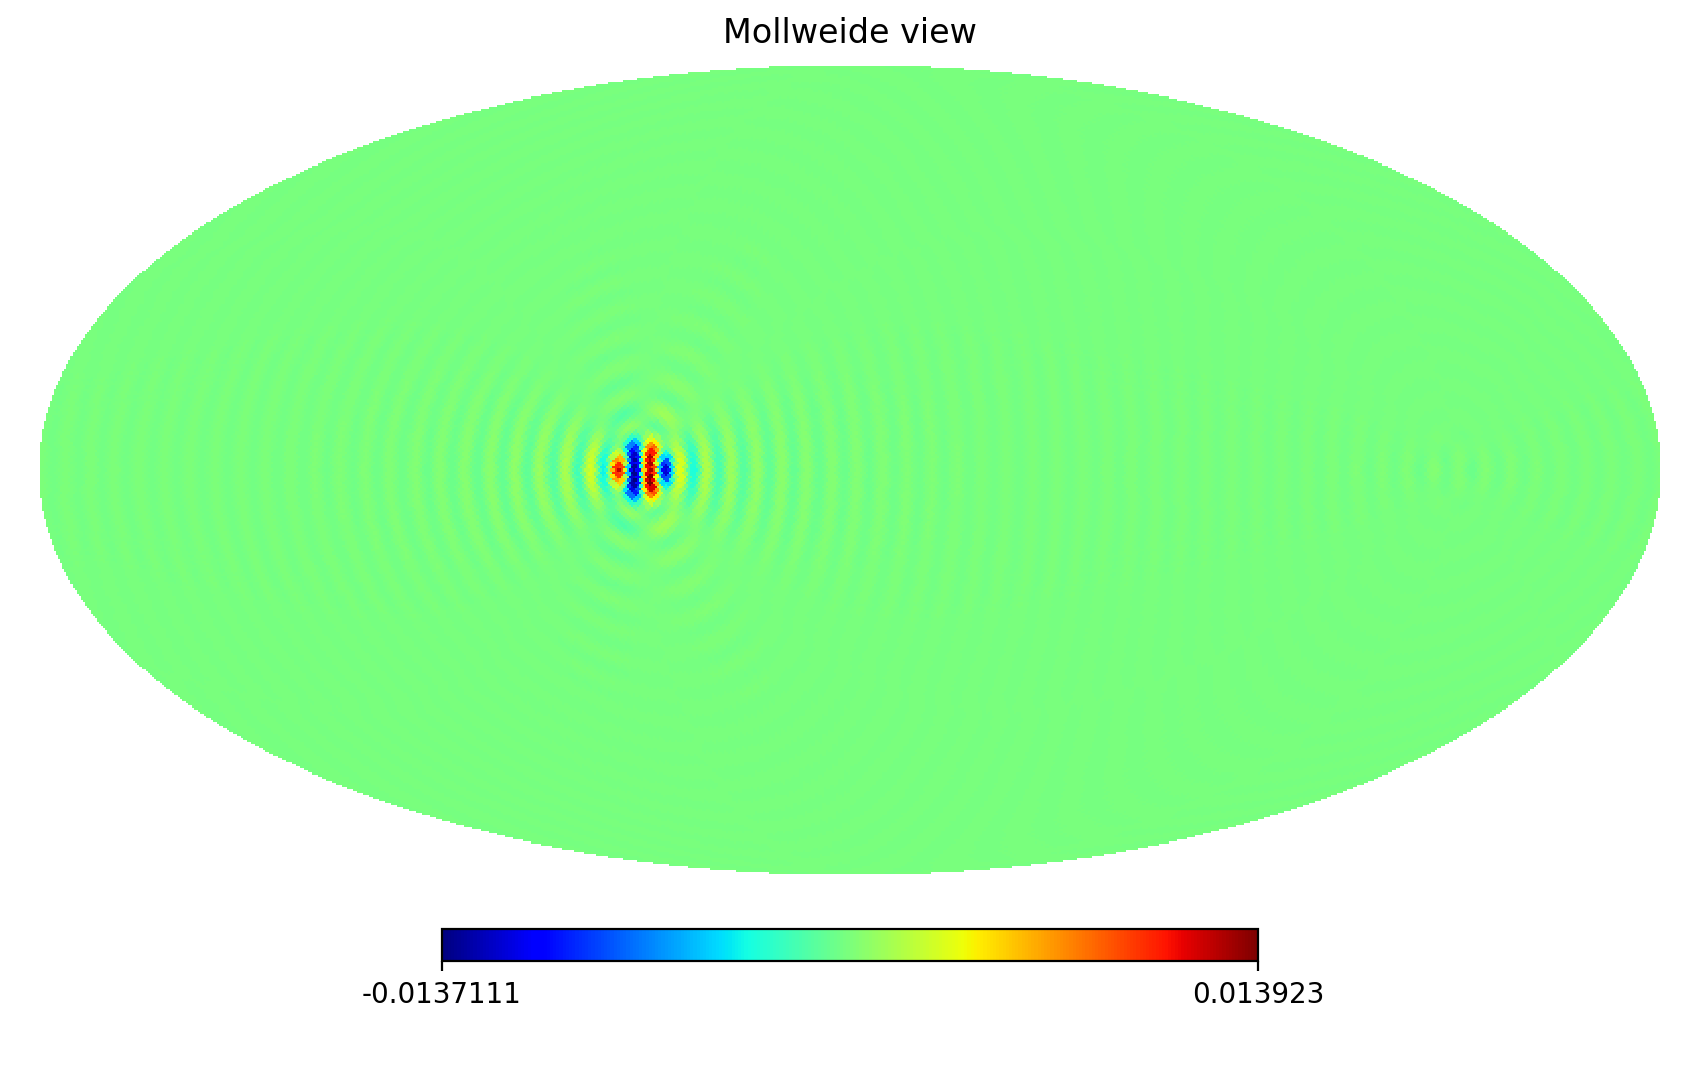

<IPython.core.display.Javascript object>


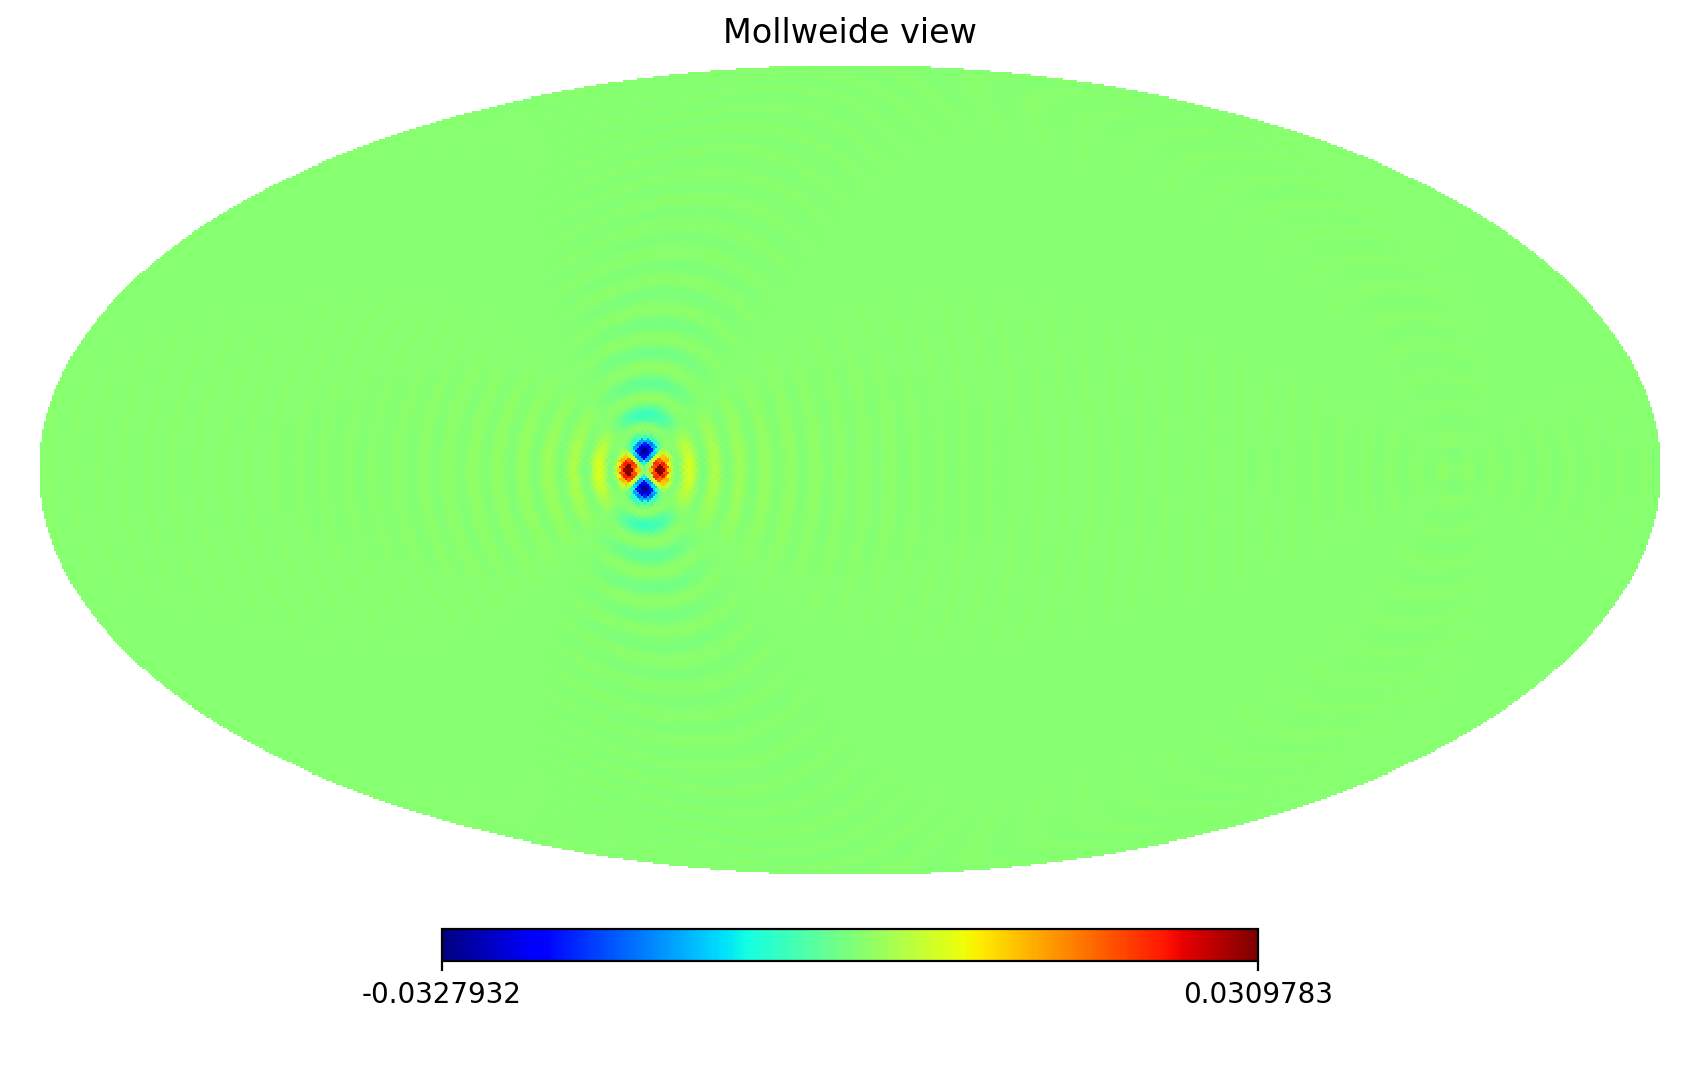

In [188]:
almr=h.map2alm(mrg1,lmax=lmax)
h.rotate_alm(almr,gn-pi/4,bn,an+pi/4,lmax=lmax)
rmrg=h.alm2map(almr,nside)
h.mollview(rmrg-mrg2)#,rot=(phi2*180./pi,90-theta2*180./pi))
h.mollview(mrg2)#,rot=(phi2*180./pi,90-theta2*180./pi))

In [5]:
nside=8 ; lmax=2*nside ;lmin=2
pix=arange(h.nside2npix(nside))
ell=arange(3*nside+1)

fl=ones(3*nside+1,float) ; fl[:lmin]=0 ; fl[lmax+1:]=0.
wl=sqrt((2.*ell+1.)/(4.*pi))*y.omega*0.5 ; wl=wl*fl

m1=zeros(h.nside2npix(nside),float)

dm=[m1,m1,m1]
im=[m1,m1,m1]


ialm=h.map2alm(im,lmax=lmax,pol=True)
dalm=h.map2alm(dm,lmax=lmax,pol=True)


almsize=h.Alm.getsize(lmax,lmax)

for i in range(almsize):
    l,m=h.Alm.getlm(lmax,i)
    if l>1 and m==2:
        ialm[1][i]=wl[l]*complex(-1.,0.)*0.5
        ialm[2][i]=wl[l]*complex(0.,-1.)*0.5
        
        dalm[1][i]=wl[l]*complex(-1.,0.)*0.5
        dalm[2][i]=wl[l]*complex(0.,1.)*0.5

im=h.alm2map(ialm,8*nside,pol=True)        
dm=h.alm2map(dalm,8*nside,pol=True)

NameError: name 'y' is not defined

In [168]:
tialm=h.map2alm(im,lmax=lmax,pol=True)
tdalm=h.map2alm(dm,lmax=lmax,pol=True)
tialm=copy(ialm)
tdalm=copy(dalm)

thetai=25.*pi/180. ; phii=45.*pi/180.
pixi=h.ang2pix(nside,thetai,phii) ; print "Pix i:",pixi
thetai,phii=h.pix2ang(nside,pixi)
h.rotate_alm(ialm,0.,thetai,phii,lmax=lmax)
h.rotate_alm(dalm,0.,thetai,phii,lmax=lmax)


rim=h.alm2map(ialm,nside,pol=True)
rdm=h.alm2map(dalm,nside,pol=True)

Pix i: 2128
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [169]:
npix=h.nside2npix(nside)
tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][pixi]=1.
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
alm[2][:]=0. ; equq=h.alm2map(alm,nside,pol=True)
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
alm[1][:]=0. ; bquq=h.alm2map(alm,nside,pol=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


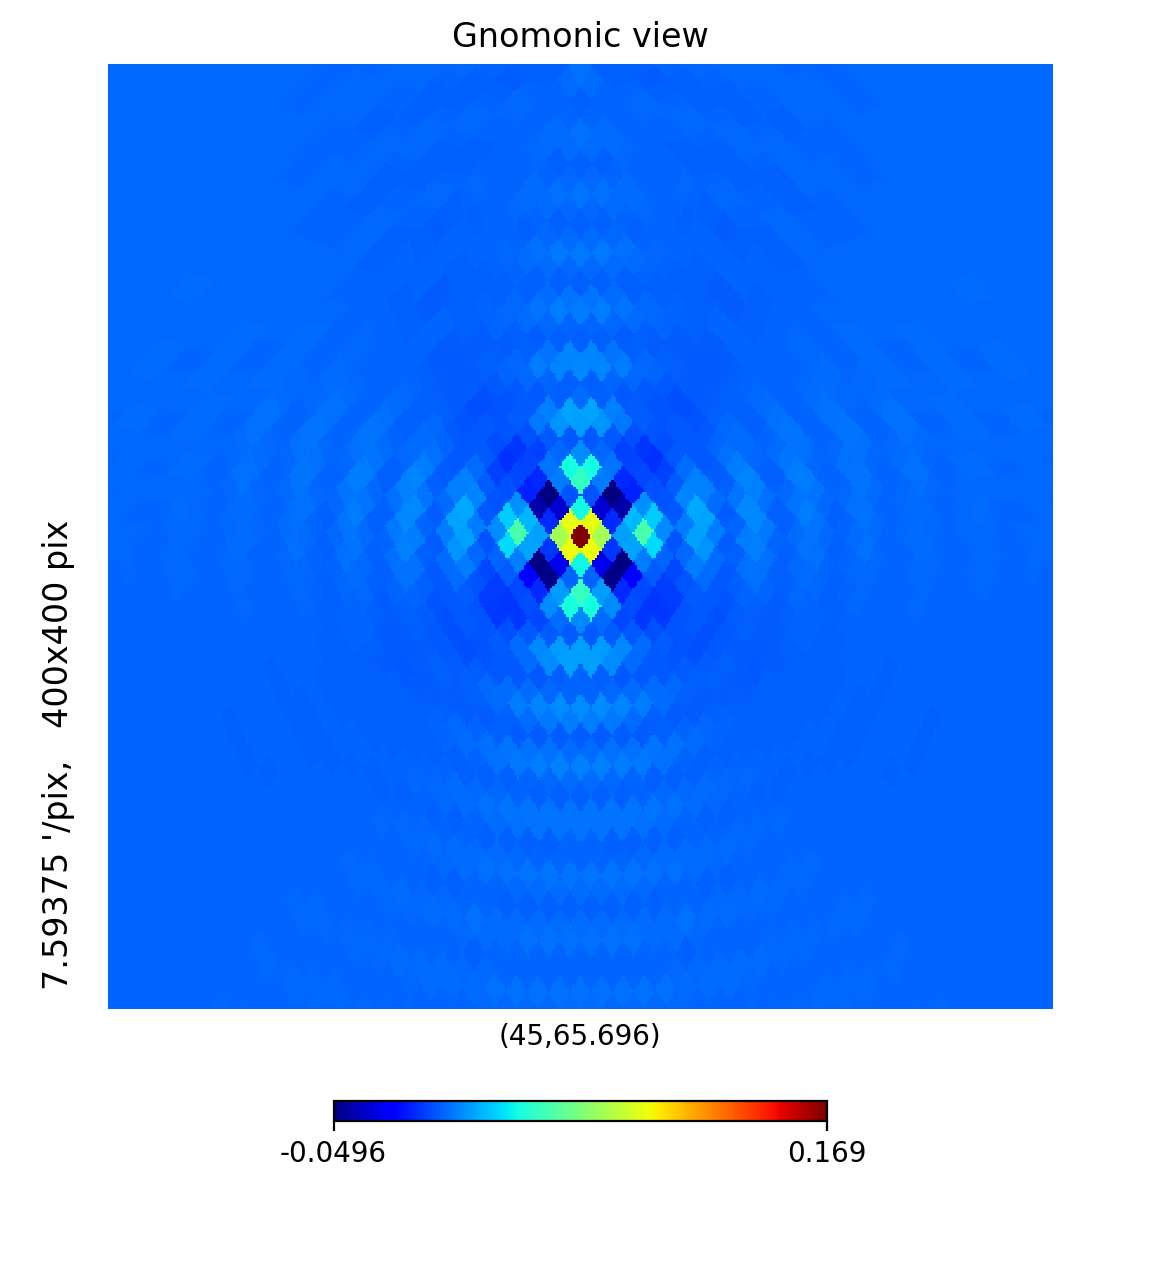

<IPython.core.display.Javascript object>


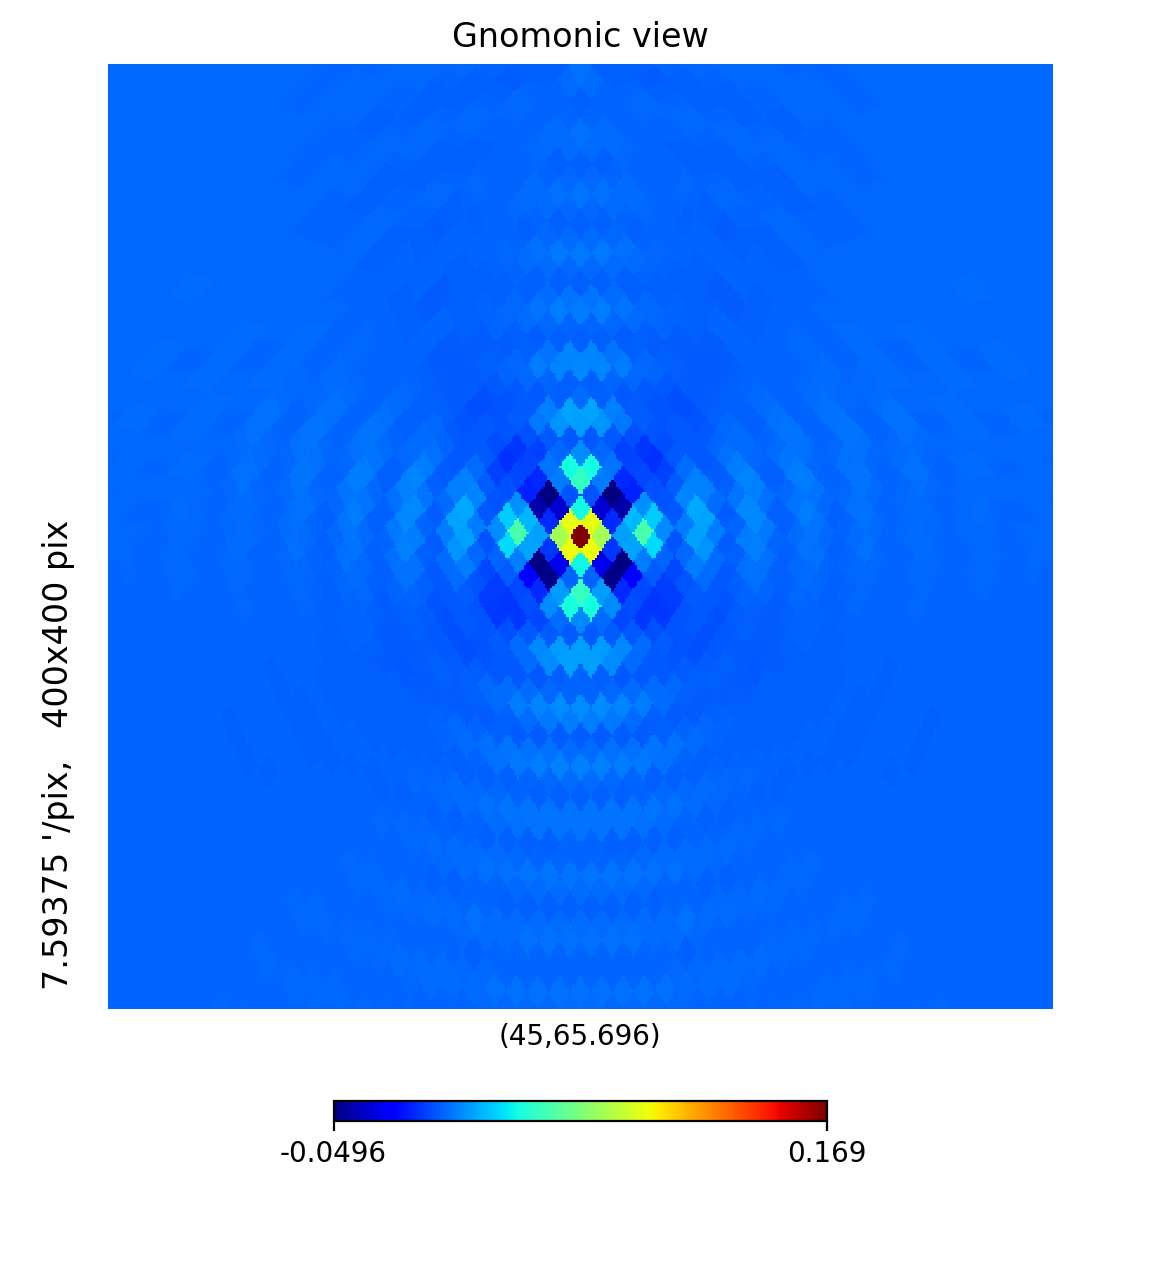

In [172]:
h.gnomview(equq[1],rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)
h.gnomview((rdm[1]+rim[1]),rot=(phii*180./pi,90-thetai*180./pi),xsize=xsize,reso=reso)

<IPython.core.display.Javascript object>


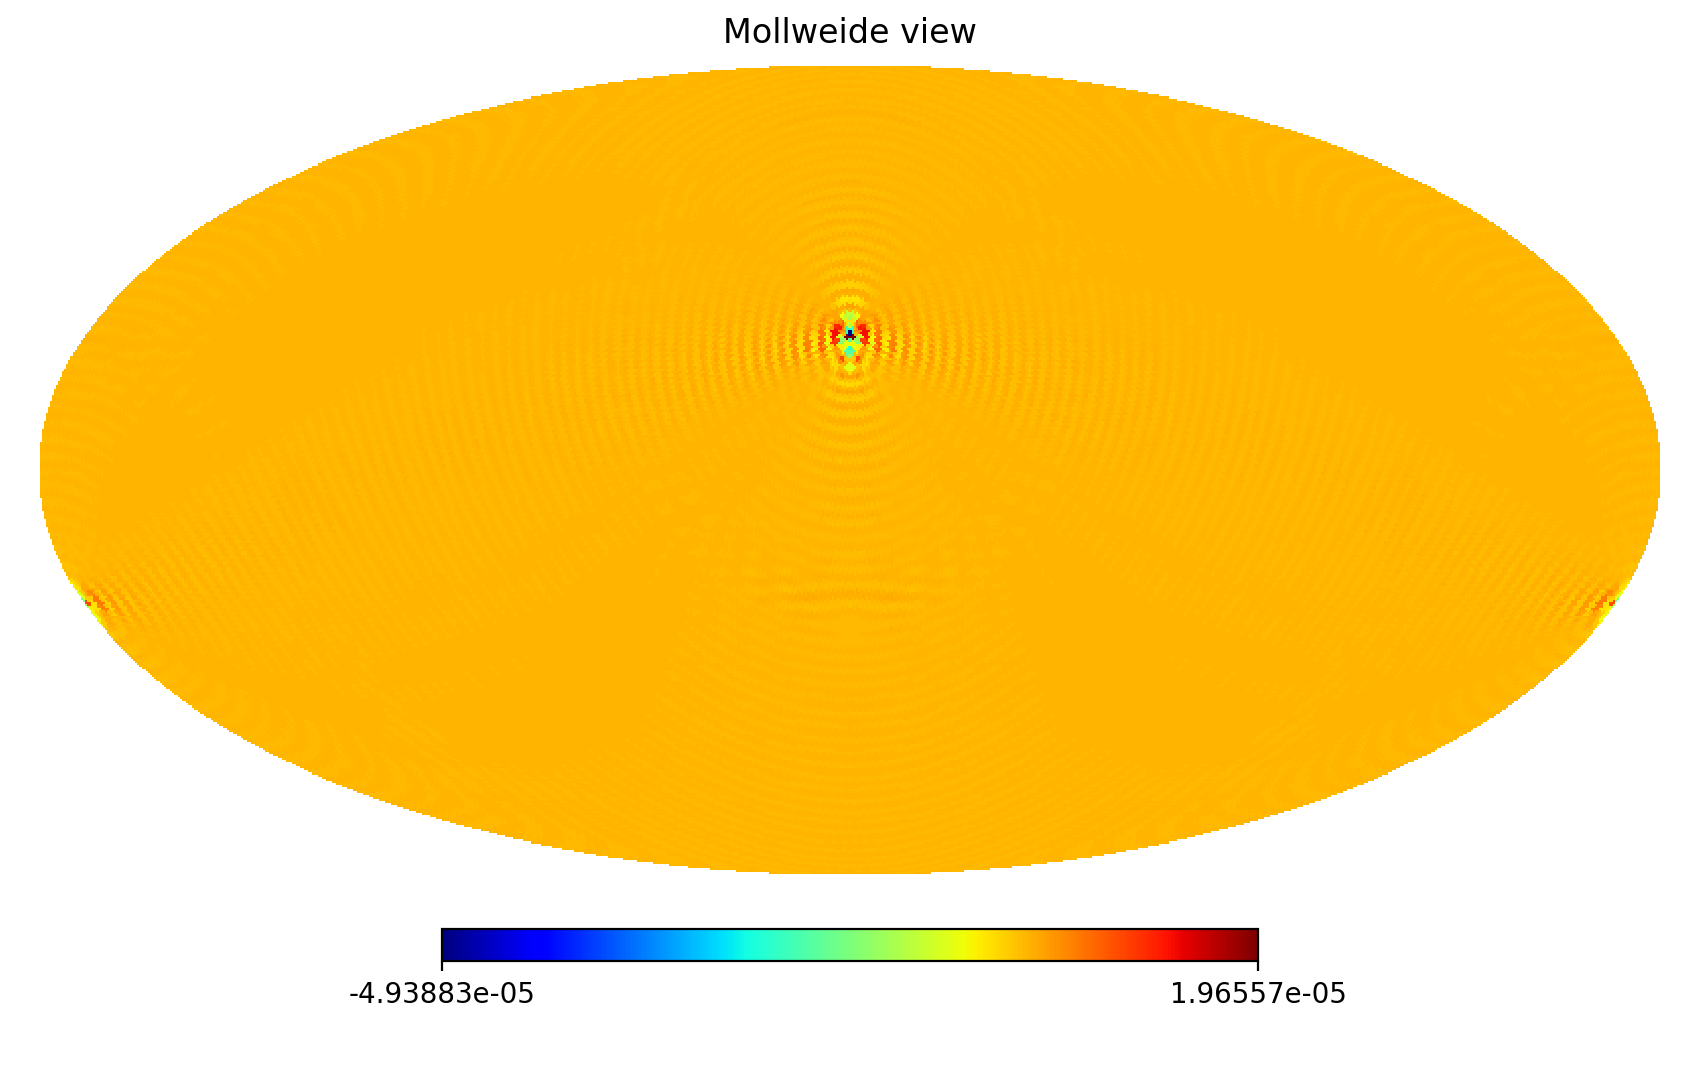

In [171]:
h.mollview(equq[1]-(rdm[1]+rim[1]),rot=(phii*180./pi,90-thetai*180./pi))

<IPython.core.display.Javascript object>


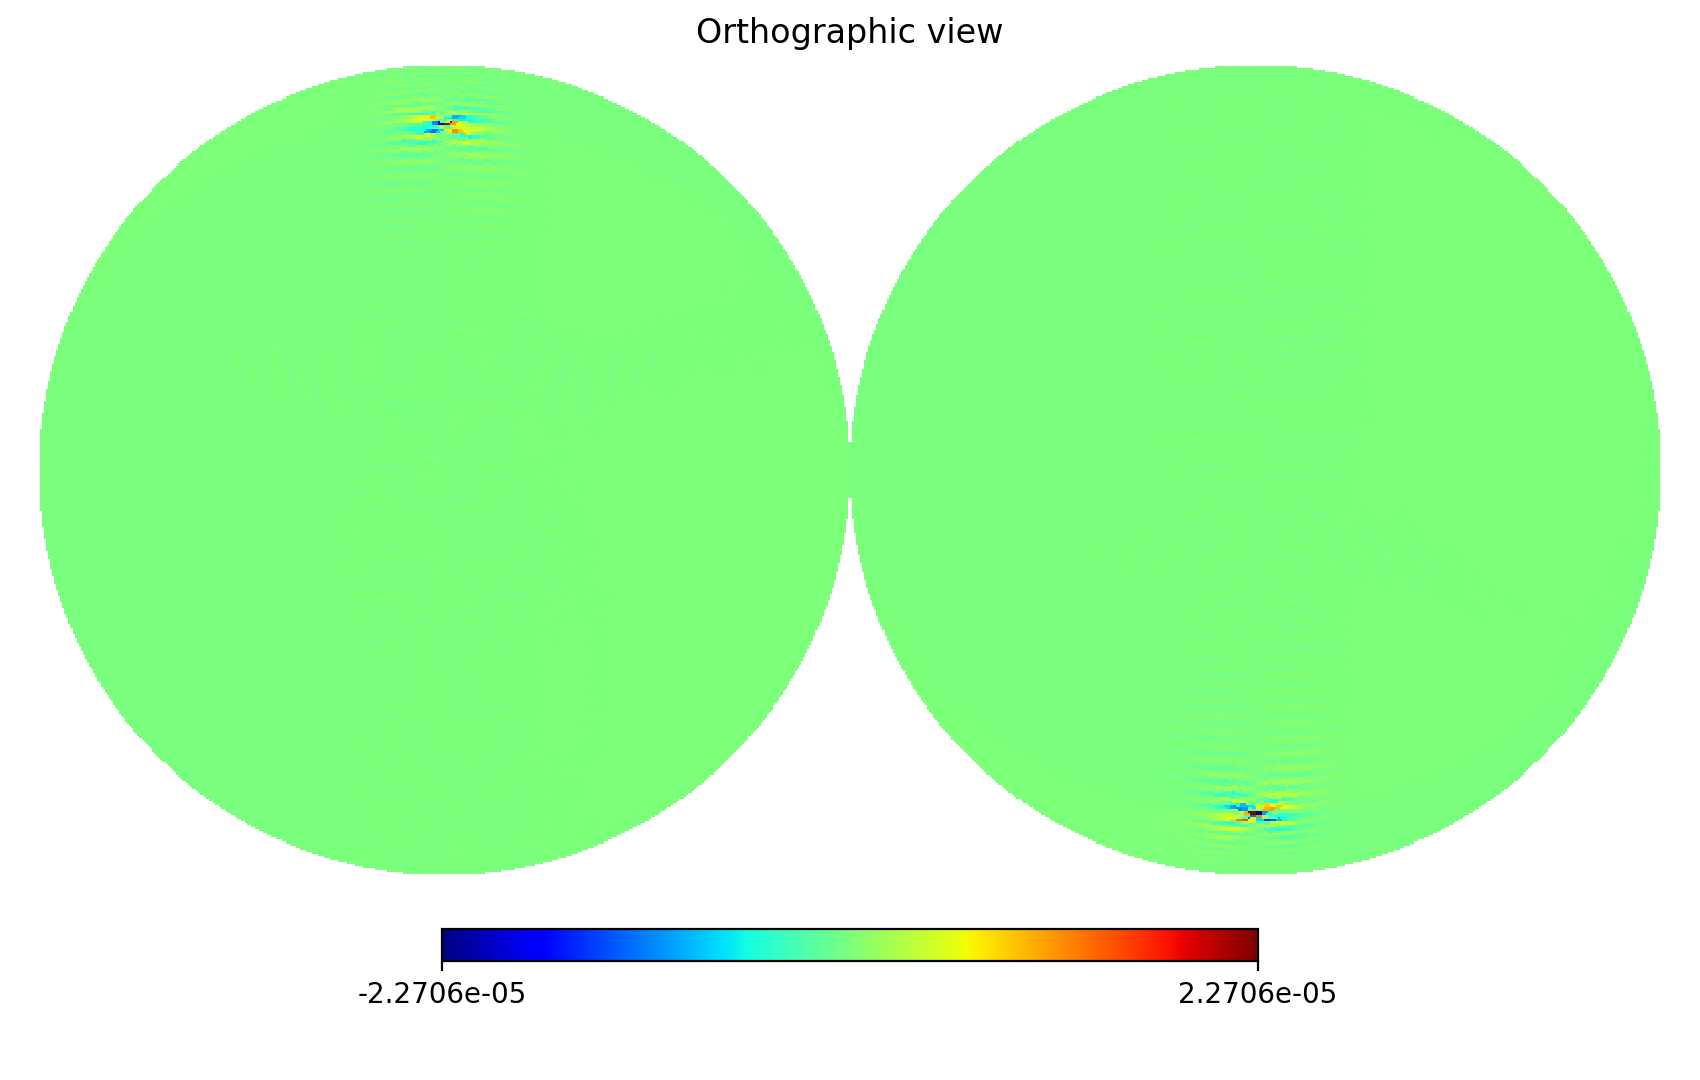

In [143]:
#h.gnomview(equq[2]-(rdm[2]+rim[2]),rot=(phii*0,90-thetai*180./pi),xsize=xsize,reso=reso)
h.orthview(equq[2]-(rdm[2]+rim[2]),rot=(phii*0,90-45.*180./pi))

In [14]:
h.get_interp_val?